# 0. Project Overview
## Porto Seguro's Safe Driver Prediction
### Predict if a driver will file an insurance claim next year.

## 0.1.Project road map 

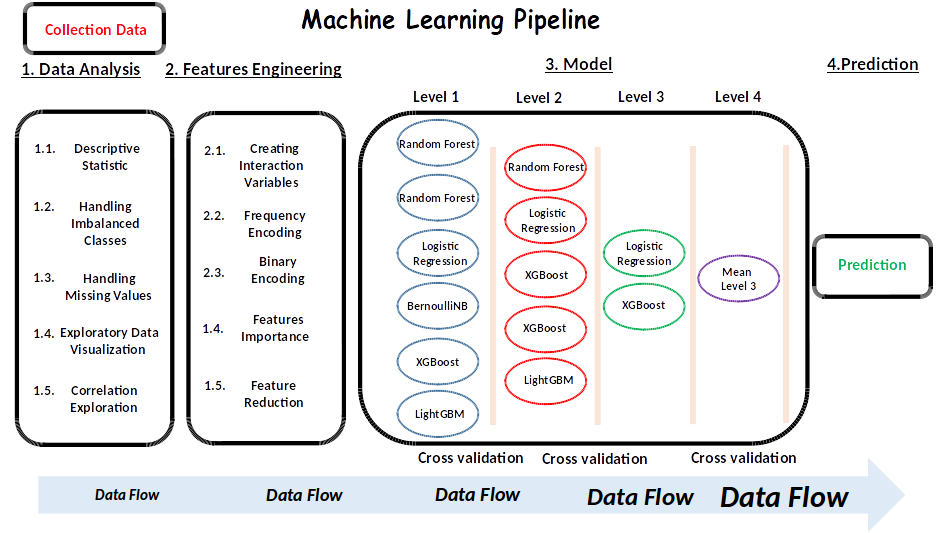

In [2]:
from IPython.display import Image
Image(filename='drawing.png')

# 1. Data Analysis 

## 1.1. Descriptive statistics

### 1.1.1 Loading packages

In [3]:
# Python libarary #############################################
import sys
import os
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

###############################################################

In [4]:
# 
import analysis.traintest.traintest as TT
import analysis.missingvalue.missingvalue as MV
import analysis.featureAnalysis.featureAnalysis as FA
import analysis.multifeaurecomparision.multicomparision as MC
import preparing.categoricalEncoding as PCAT
import preparing.sampling as SA
import preparing.featuressel as FSEL
import model.model as ML
###############################################################

In [5]:
# putting apple on the search path -- robust method
sys.path.insert(0, os.path.join(os.path.split('__file__')[0], '..'))

### 1.1.2. Loading Data

In [6]:
def LoadingData(path_to_train, path_to_test):
    try:
        train = pd.read_csv(path_to_train)
        test = pd.read_csv(path_to_test)
        return train, test
    except FileNotFoundError:
        print("The path does not exist")

In [6]:
df_train, df_test = LoadingData('./data/train.csv', './data/test.csv')

### 1.1.3. Data at First Sight

Here is an excerpt of the the data description for the competition:

 - Features that belong to **similar groupings are tagged** as such in the feature names (e.g., ind, reg, car, calc).
 - Feature names include the postfix **bin** to indicate binary features and cat to indicate categorical features.
 - Features **without these designations are either continuous or ordinal**.
 - Values of **-1** indicate that the feature was missing from the observation.
 - The **target** columns signifies whether or not a claim was filed for that policy holder.

In [7]:
print("The shape of train is: ", df_train.shape)
print("The shape of test is: ", df_test.shape)

The shape of train is:  (595212, 59)
The shape of test is:  (892816, 58)


In [8]:
tt = TT.TrainTestAnalysis(df_train, df_test)
tt.TrainTestCompare()

We have 595212 training rows and 892816 test rows.
We have 59 training columns and 58 test columns.
Train and test sets are distinct.
There is no NaN


In [9]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [10]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


We indeed see the following

 - binary variables
 - categorical variables of which the category values are integers
 - other variables with integer or float values
 - variables with -1 representing missing values
 - the target variable and an ID variable

### 1.1.4. Descriptive Statistics
** Meta Data:** To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling, ...



We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

In [11]:
fa = FA.DataExploration(df_train)
feature_inofrmation = fa.DesAnalysis(True)

,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
0,id,int64,595212,0,1050623,1,492634,1,320566,1,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
1,target,int64,2,595210,0,573518,1,21694,NaN,NaN,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
2,ps_ind_01,int64,8,595204,0,187594,1,143984,2,82468,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
3,ps_ind_02_cat,int64,5,595207,1,431859,2,123573,3,28186,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
4,ps_ind_03,int64,12,595200,2,96110,3,81973,1,67994,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
5,ps_ind_04_cat,int64,3,595209,0,346965,1,248164,-1,83,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
6,ps_ind_05_cat,int64,8,595204,0,528009,6,20662,4,18344,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
7,ps_ind_06_bin,int64,2,595210,0,360852,1,234360,NaN,NaN,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
8,ps_ind_07_bin,int64,2,595210,0,442223,1,152989,NaN,NaN,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
9,ps_ind_08_bin,int64,2,595210,0,497644,1,97568,NaN,NaN,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


** reg variables**
- only ps_reg_03 has missing values
- the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use.

** car variables**
- ps_car_12 and ps_car_15 have missing values
- again, the range differs and we could apply scaling.

** calc variables**
- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three _calc variables have very similar distributions

** Ordinal variables**
- Only one missing variable: ps_car_11
- We could apply scaling to deal with the different ranges

** Binary variables **
- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that for most variables the value is zero in most cases.

** Target **
- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that for most variables the value is zero in most cases.

## 1.2. Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

oversampling records with target=1
undersampling records with target=0

### 1.2.1. Plot Target

In [12]:
fa.PlotBinary(df_train,['target'])

### 1.2.3. Sampeling Data 
As we have a rather large training set, we can go for undersampling.

In [13]:
sa = SA.Sampling(df_train)
train = sa.UnderSampling('target', .1)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [14]:
# Sample analysis
sfa = FA.DataExploration(train)
sample_feature_inofrmation = sfa.DesAnalysis(False)

In [15]:
print('Percentage of {0} in train {1}'.format(feature_inofrmation['freq1'][1],
                                           feature_inofrmation['freq1_val'][1]/feature_inofrmation['Nunique'][0]))
print('Percentage of {0} in train {1}'.format(feature_inofrmation['freq2'][1],
                                           feature_inofrmation['freq2_val'][1]/feature_inofrmation['Nunique'][0]))
print('Percentage of {0} in sample train {1}'.format(feature_inofrmation['freq1'][1],
                                                           sample_feature_inofrmation['freq1_val'][1]/sample_feature_inofrmation['Nunique'][0]))
print('Percentage of {0} in sample train {1}'.format(feature_inofrmation['freq2'][1],
                                                     sample_feature_inofrmation['freq2_val'][1]/sample_feature_inofrmation['Nunique'][0]))

Percentage of 0 in train 0.963552482140817
Percentage of 1 in train 0.036447517859182946
Percentage of 0 in sample train 0.9
Percentage of 1 in sample train 0.1


In [16]:
fa.PlotBinary(train,['target'])

## 1.3. Handling Missing Values

### 1.3.2. Missing Values Percentage

In [17]:
# sample missing value
missing = MV.MissingValue()
print('-*-'*30)
missing.DesMissingValue(df_train,-1)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missin

### 1.3.2. Plot MissingValue

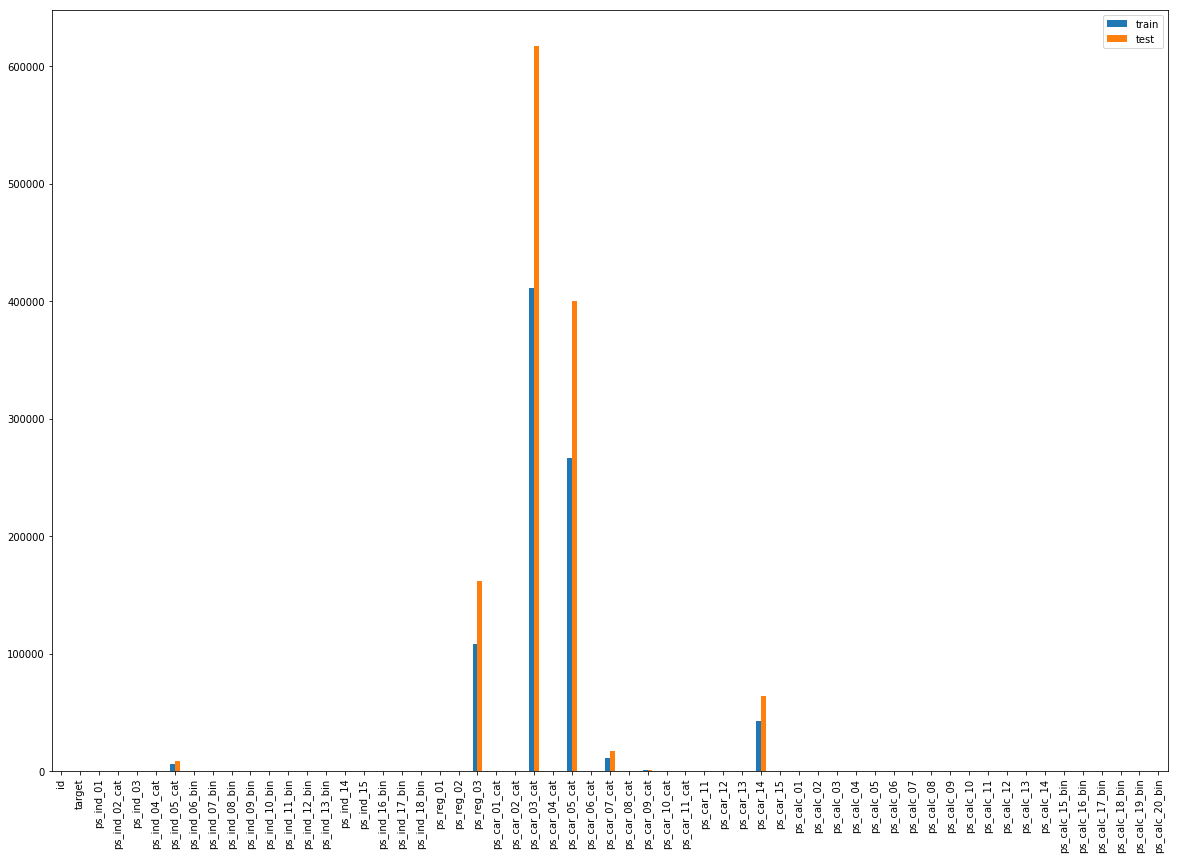

In [18]:
# train and test missing value
tt.PlotTrainTestMissing(-1, np.nan)

- **ps_car_03_cat and ps_car_05_cat** have a large proportion of records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- **ps_reg_03** (continuous) has missing values for 18% of all records. Replace by the mean.
- **ps_car_11** (ordinal) has only 5 records with misisng values. Replace by the mode.
- **ps_car_12** (continuous) has only 1 records with missing value. Replace by the mean.
- **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.

In [19]:
from sklearn.preprocessing import Imputer
# initiate test
test = df_test
# Dropping the variables with too many missing values

vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
test.drop(vars_to_drop, inplace=True, axis=1)

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## 1.4. Exploratory Data Visualization

In [20]:
print('Number of unique value: ',np.sort(feature_inofrmation.Nunique.unique()))

Number of unique value:  [2 3 5 6 7 8 10 11 12 13 14 15 18 19 20 24 26 104 184 850 5013 70482 595212]


In [21]:
feature2 = fa.Describecat(2,True)

,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
1,target,int64,2,595210,0,573518,1,21694,NaN,NaN,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
7,ps_ind_06_bin,int64,2,595210,0,360852,1,234360,NaN,NaN,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
8,ps_ind_07_bin,int64,2,595210,0,442223,1,152989,NaN,NaN,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
9,ps_ind_08_bin,int64,2,595210,0,497644,1,97568,NaN,NaN,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
10,ps_ind_09_bin,int64,2,595210,0,484917,1,110295,NaN,NaN,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
11,ps_ind_10_bin,int64,2,595210,0,594990,1,222,NaN,NaN,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
12,ps_ind_11_bin,int64,2,595210,0,594205,1,1007,NaN,NaN,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
13,ps_ind_12_bin,int64,2,595210,0,589594,1,5618,NaN,NaN,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
14,ps_ind_13_bin,int64,2,595210,0,594648,1,564,NaN,NaN,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
17,ps_ind_16_bin,int64,2,595210,1,393330,0,201882,NaN,NaN,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


plot number of unique = 2 

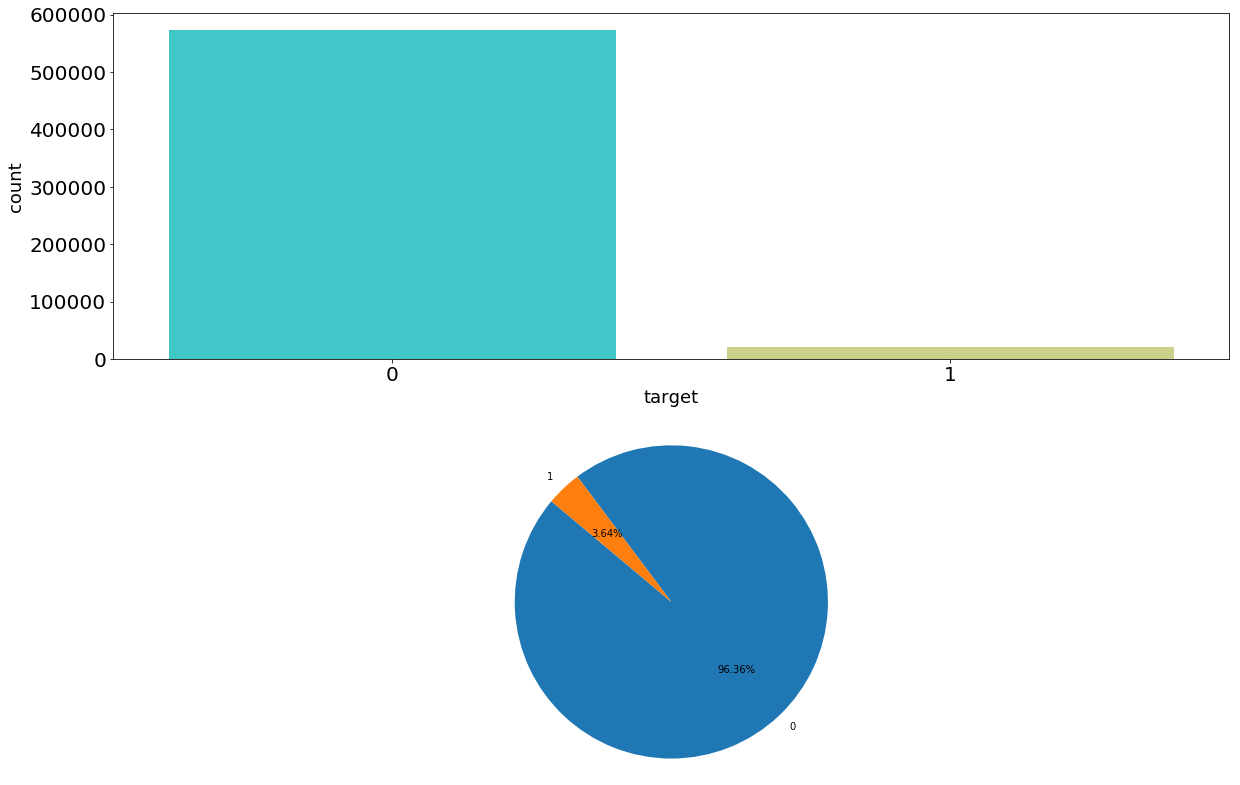

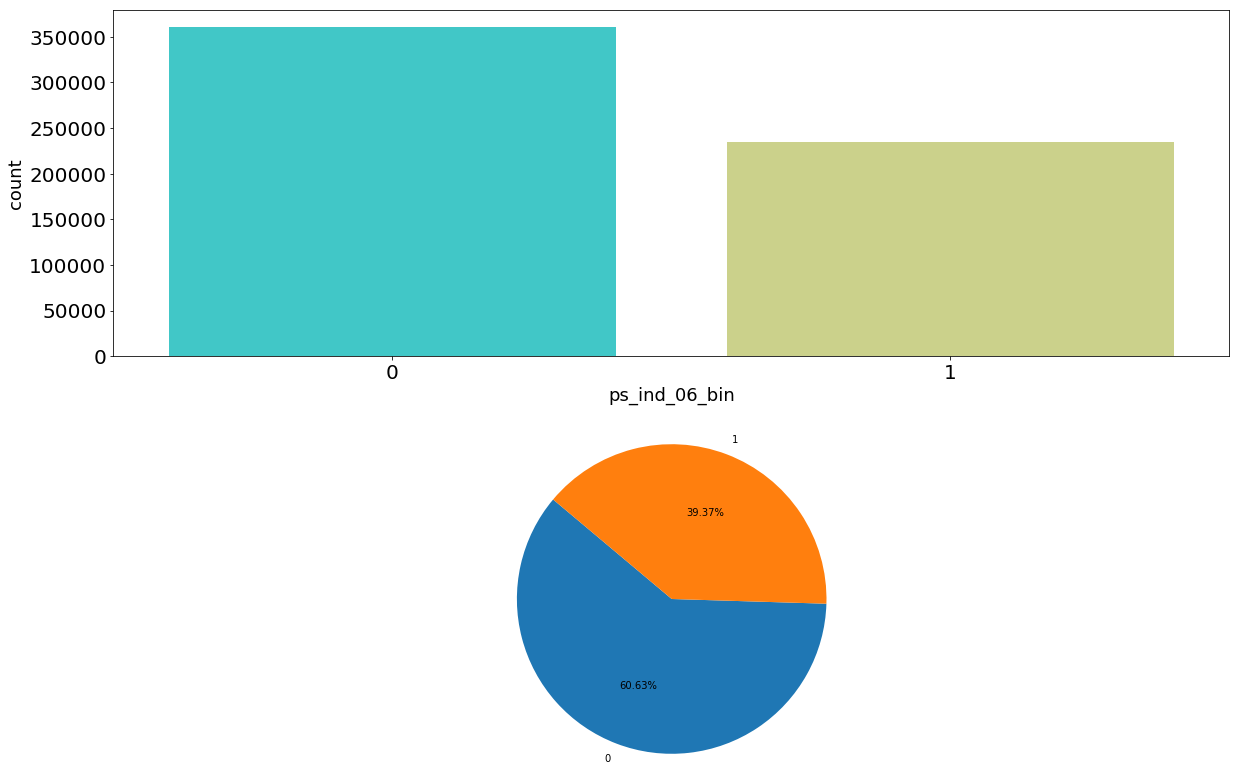

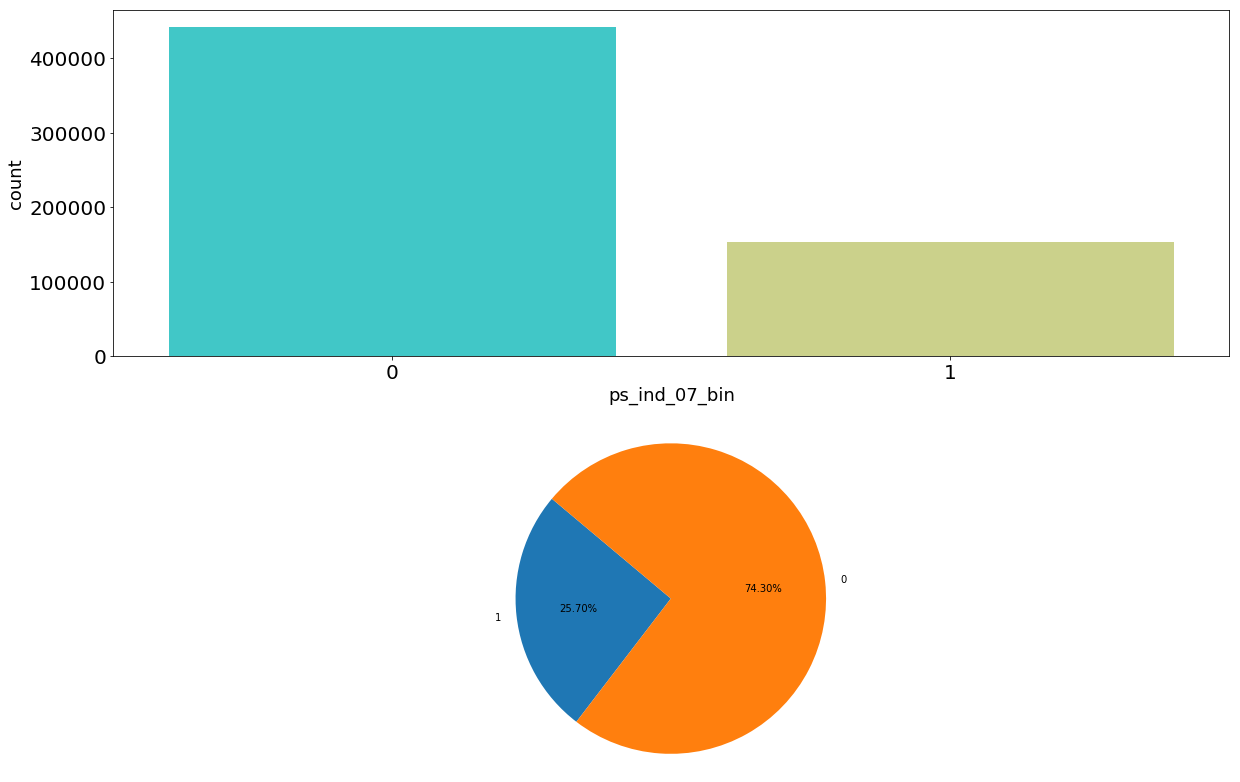

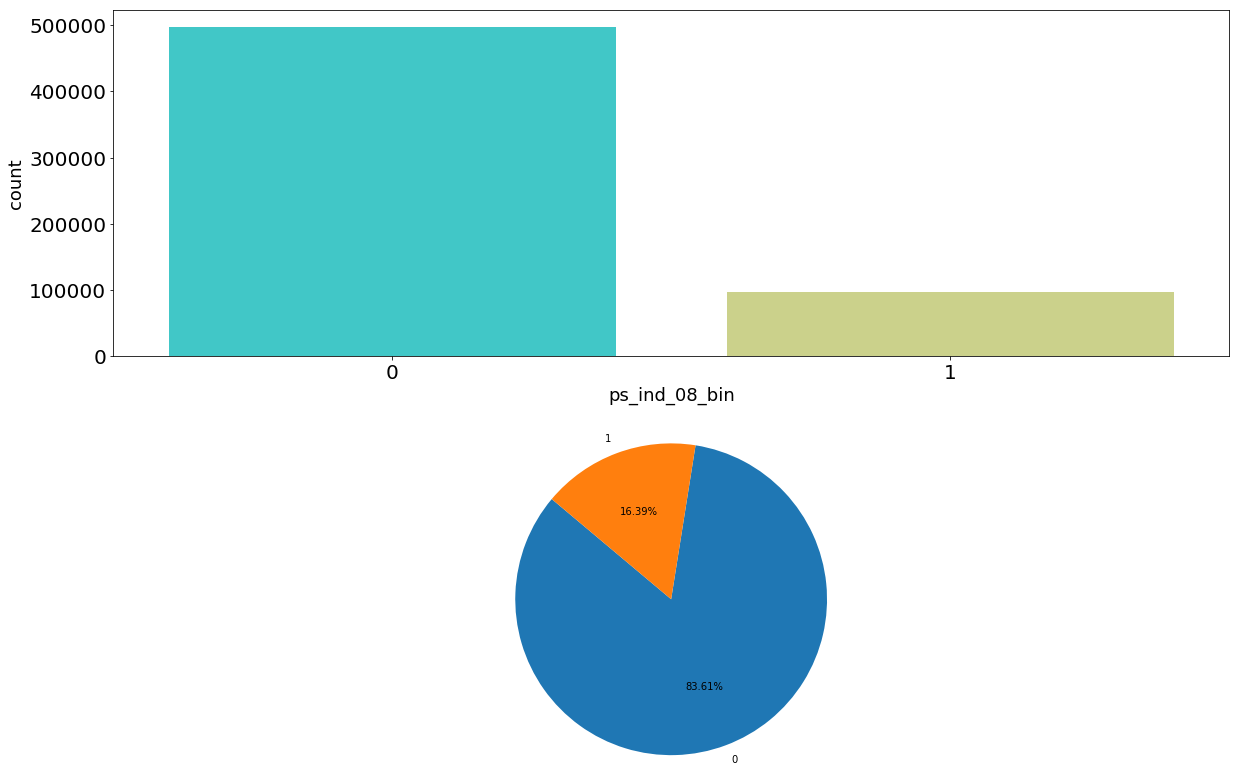

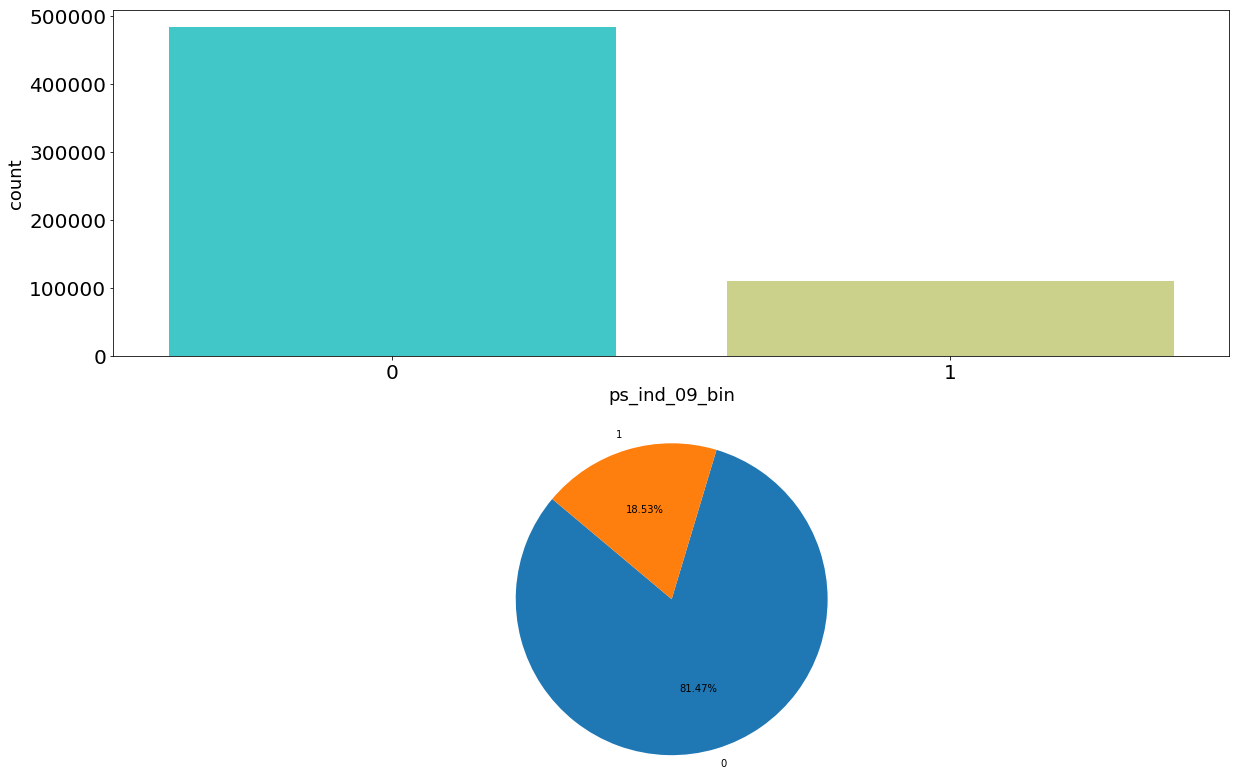

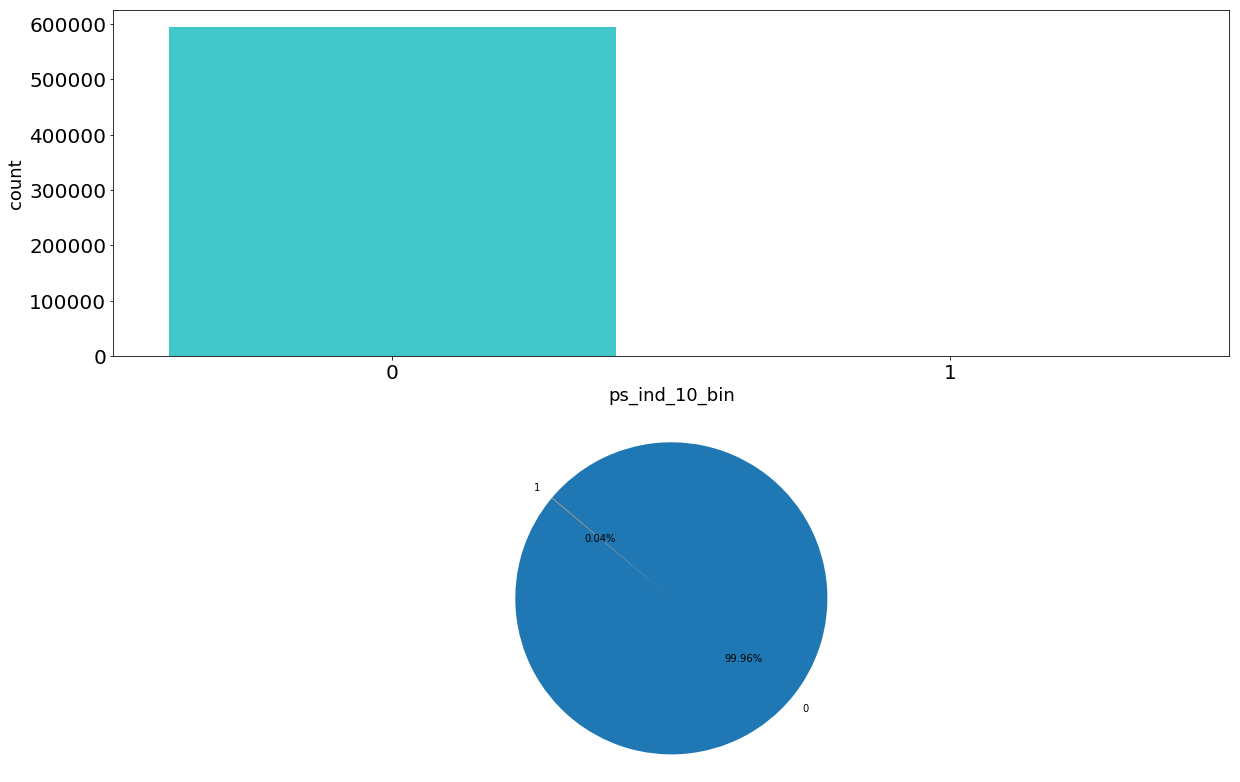

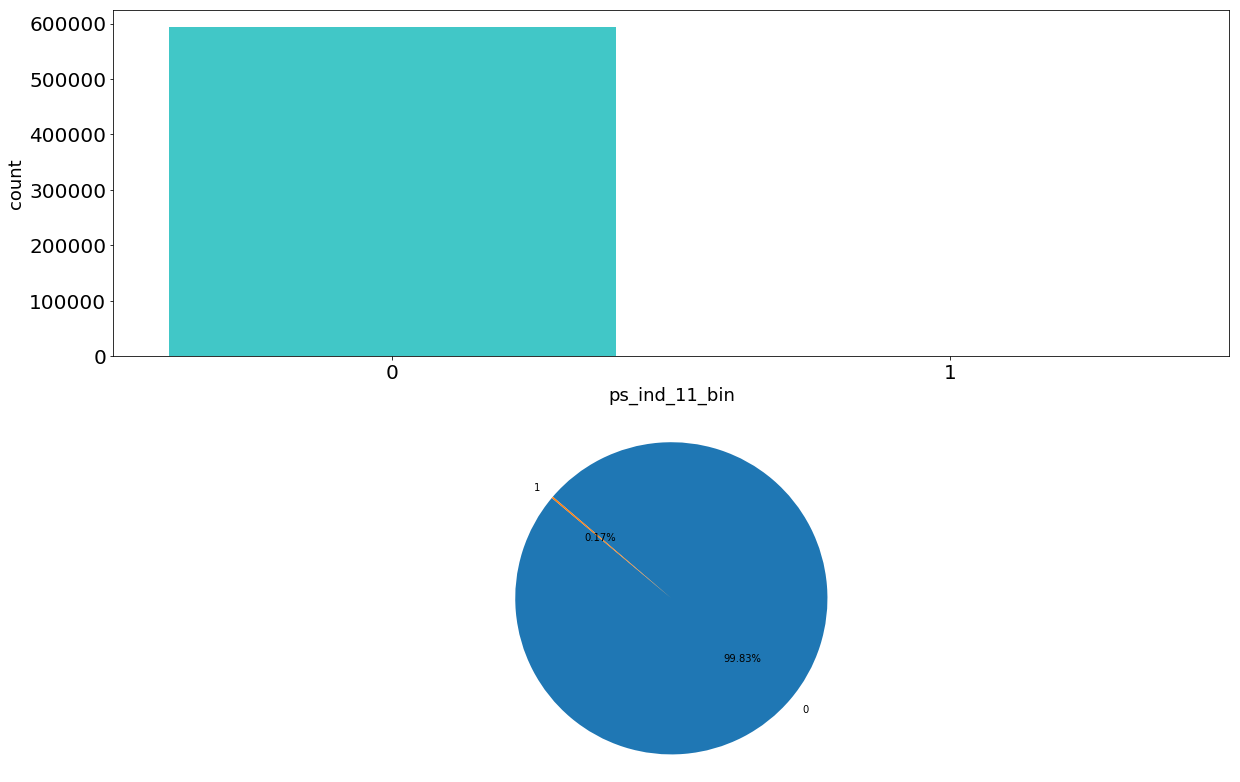

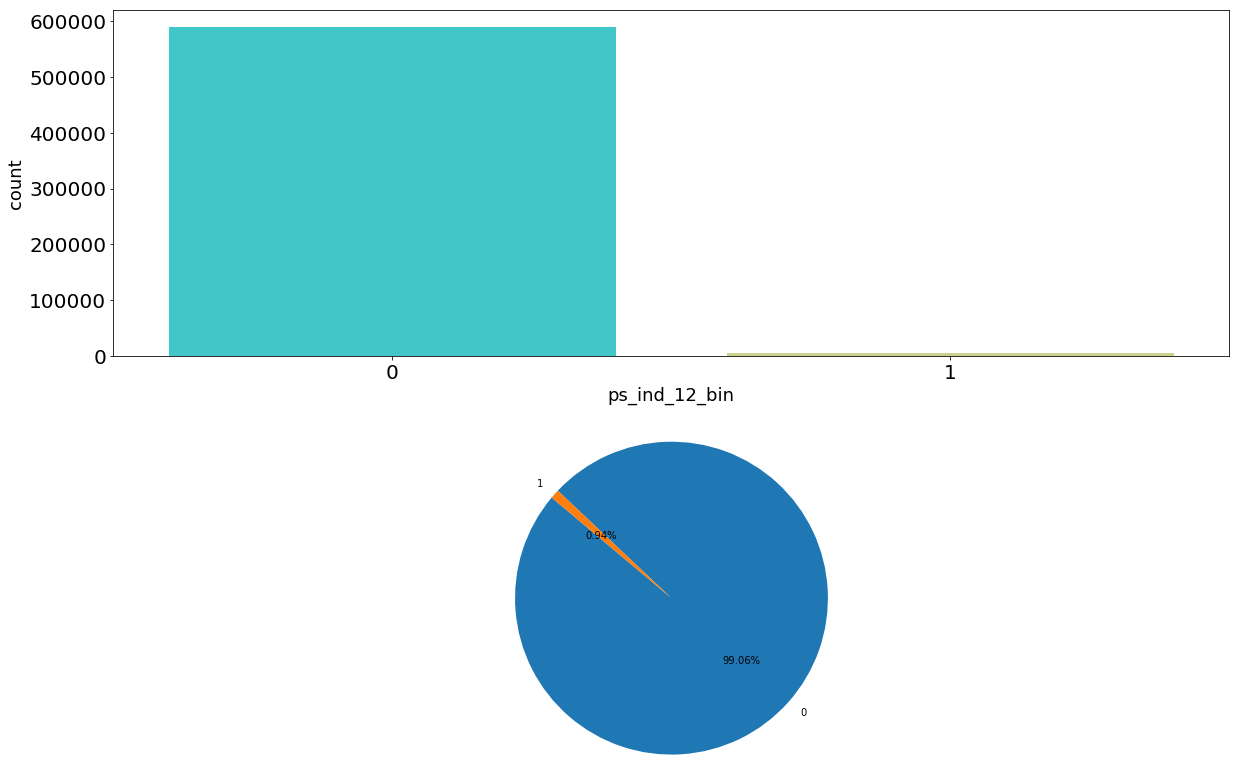

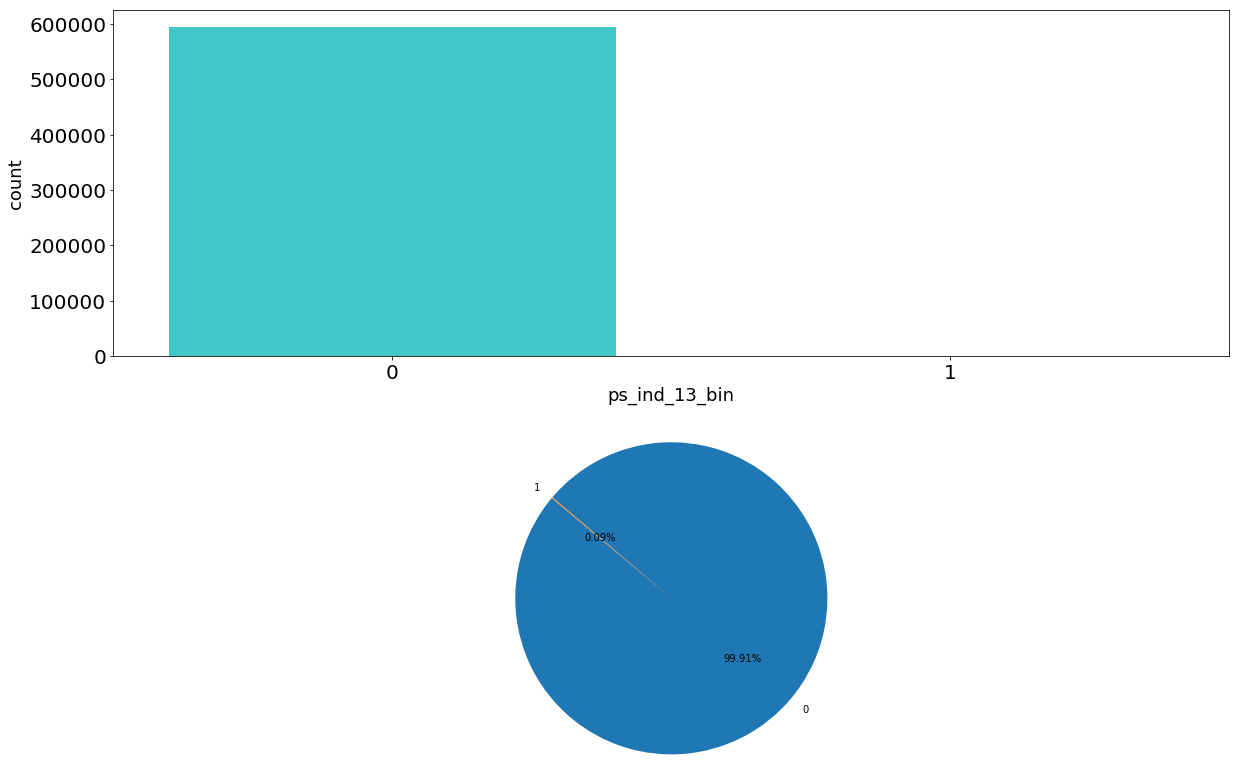

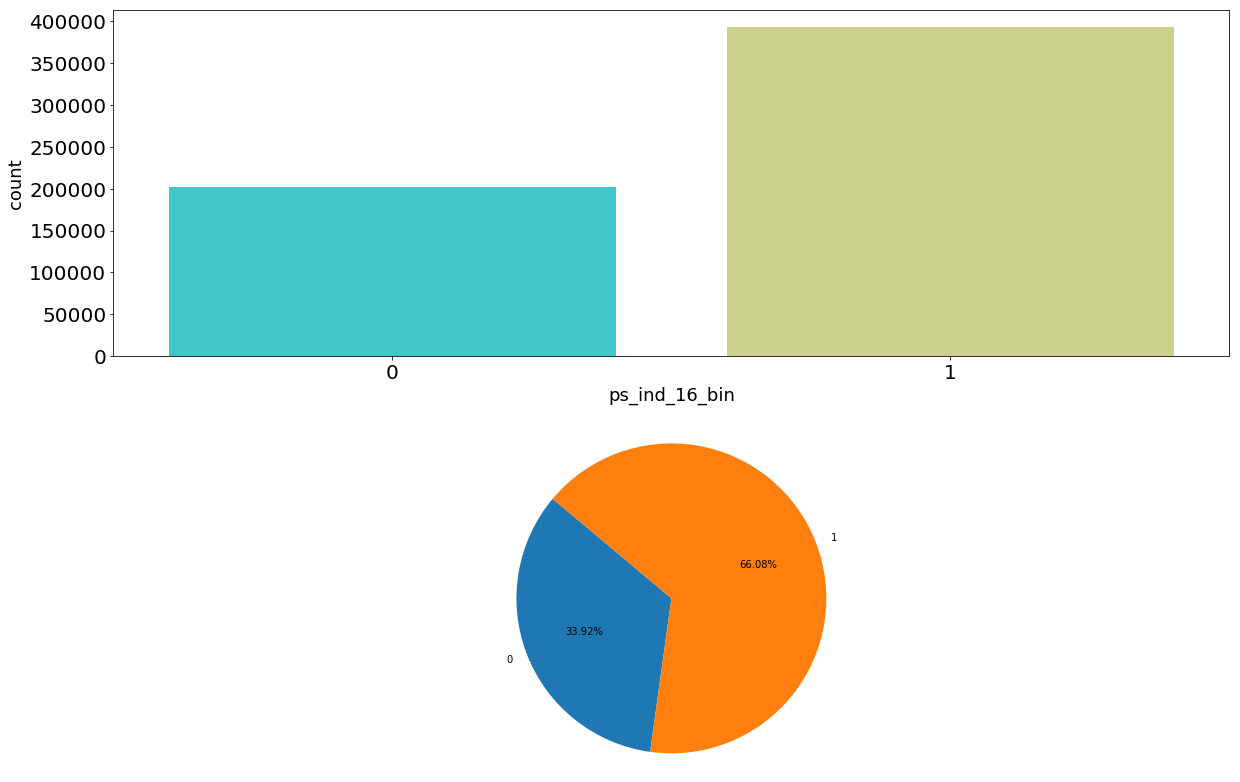

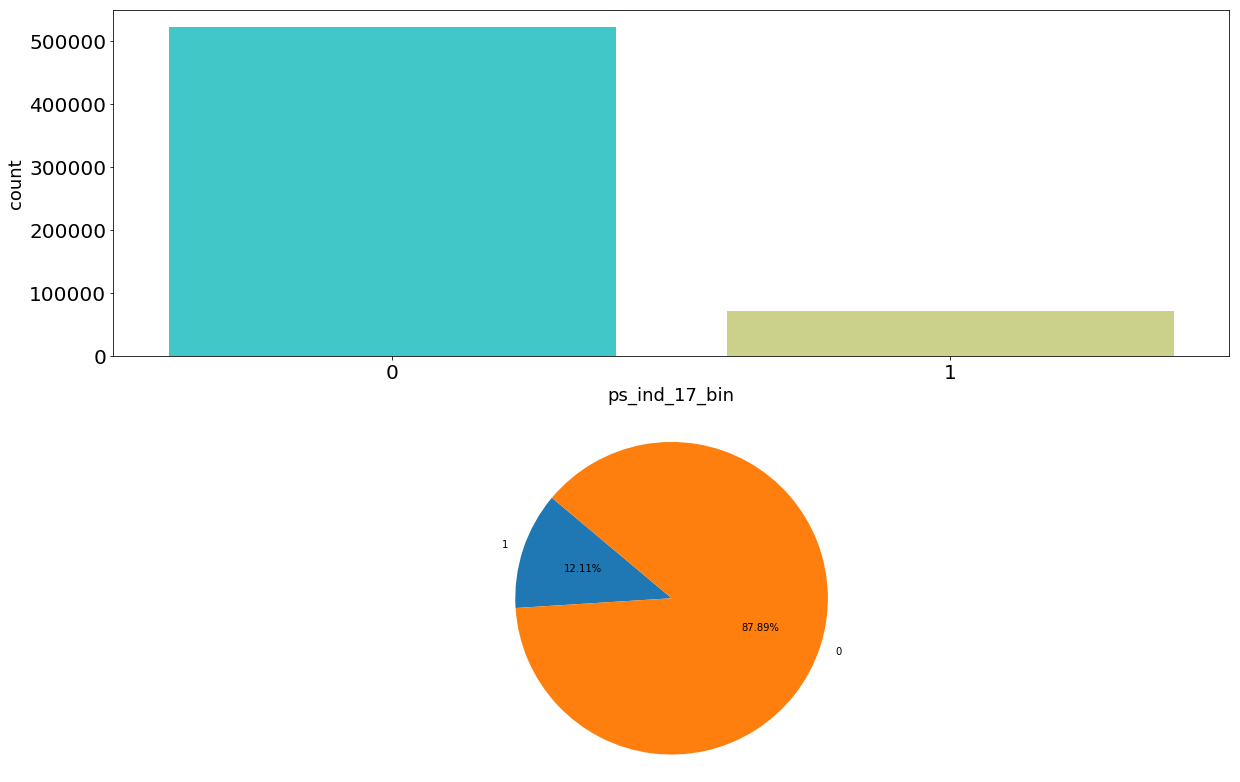

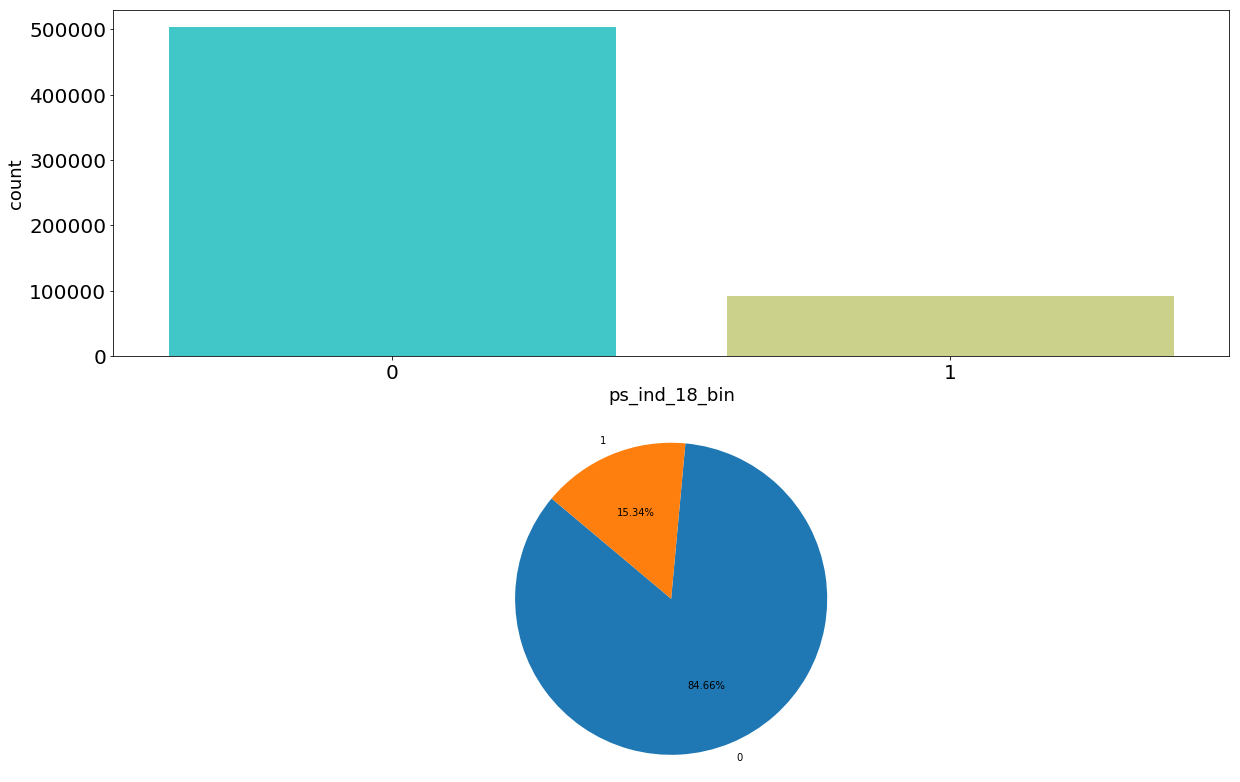

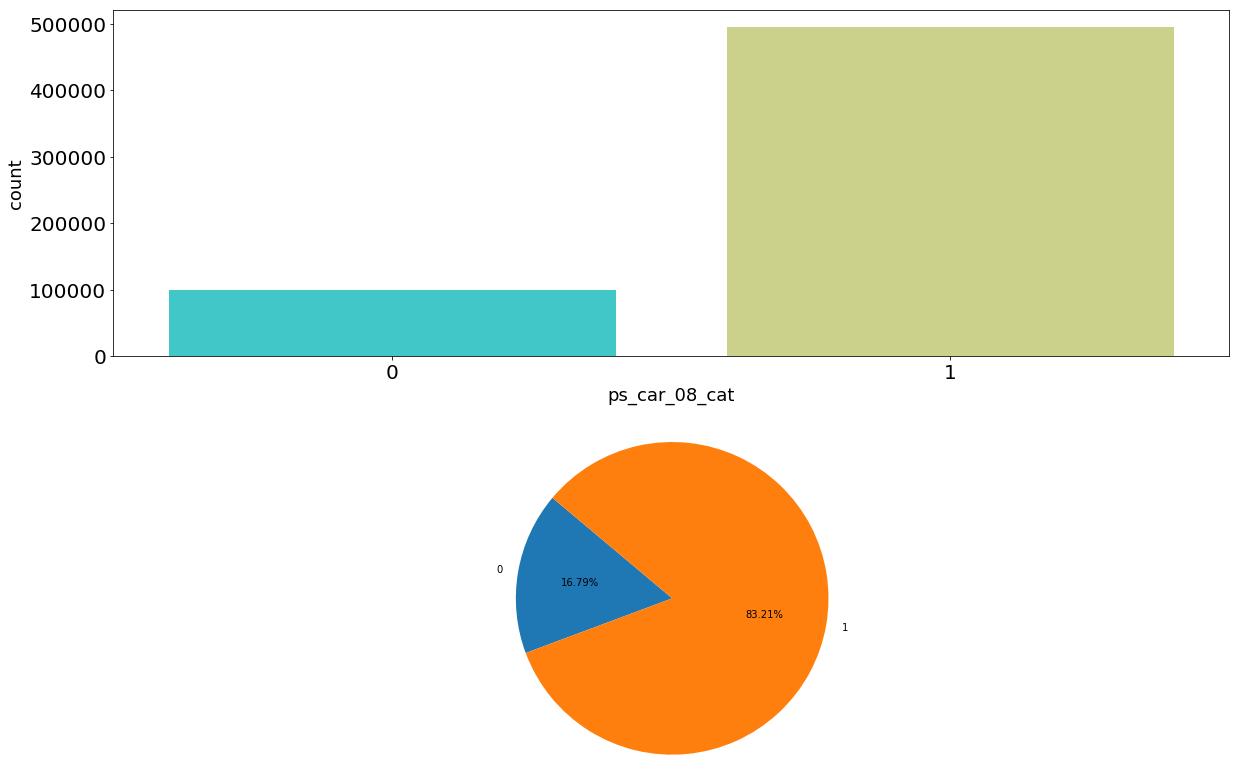

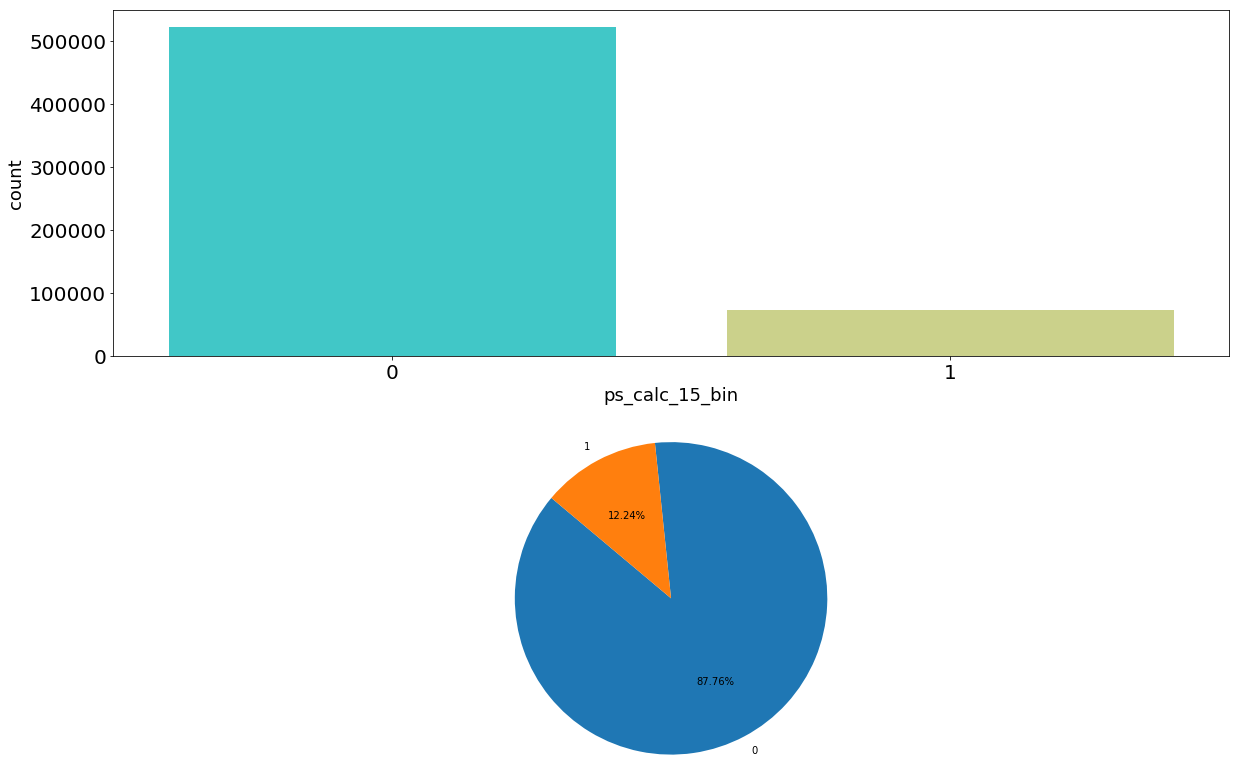

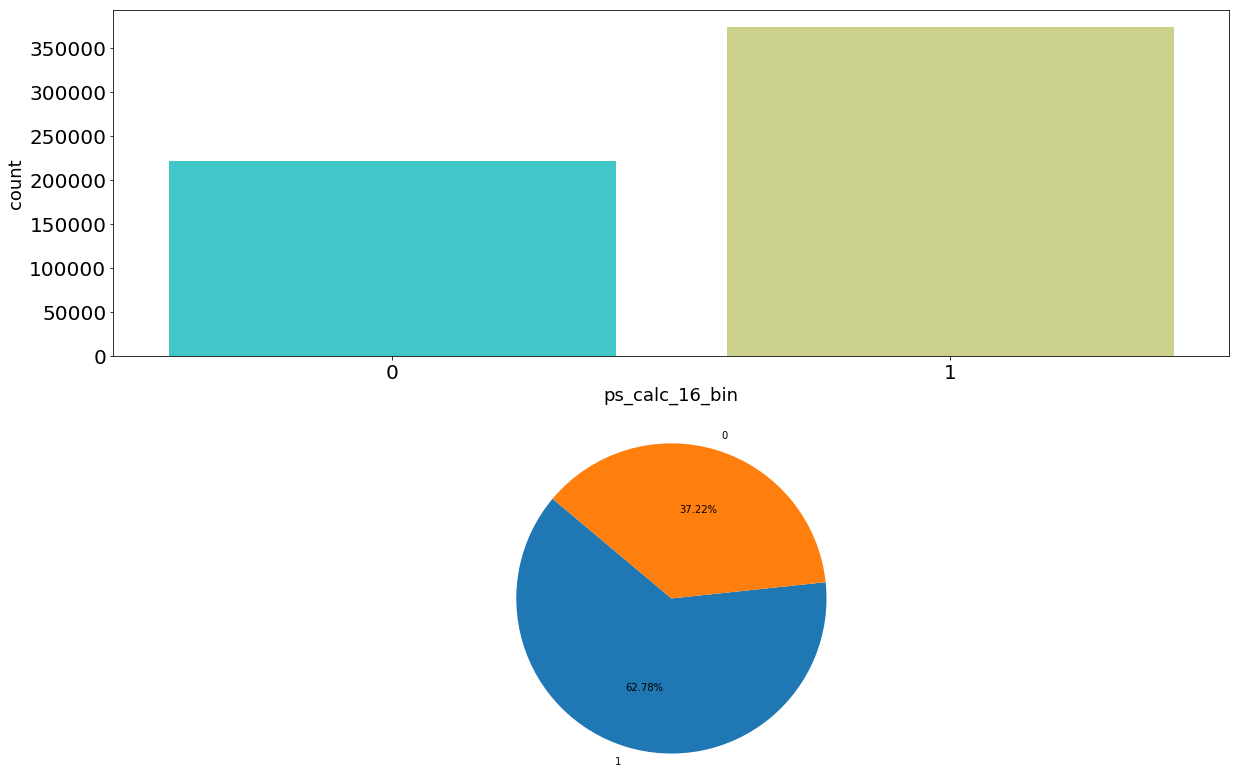

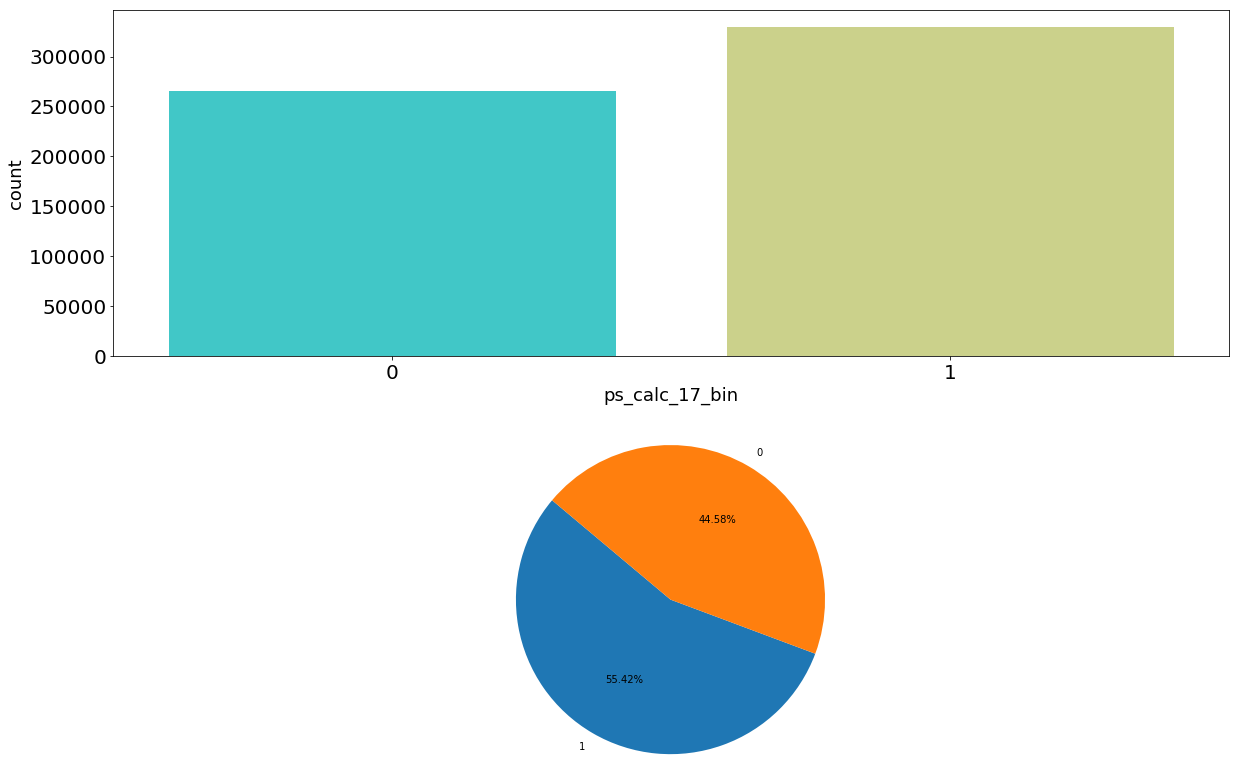

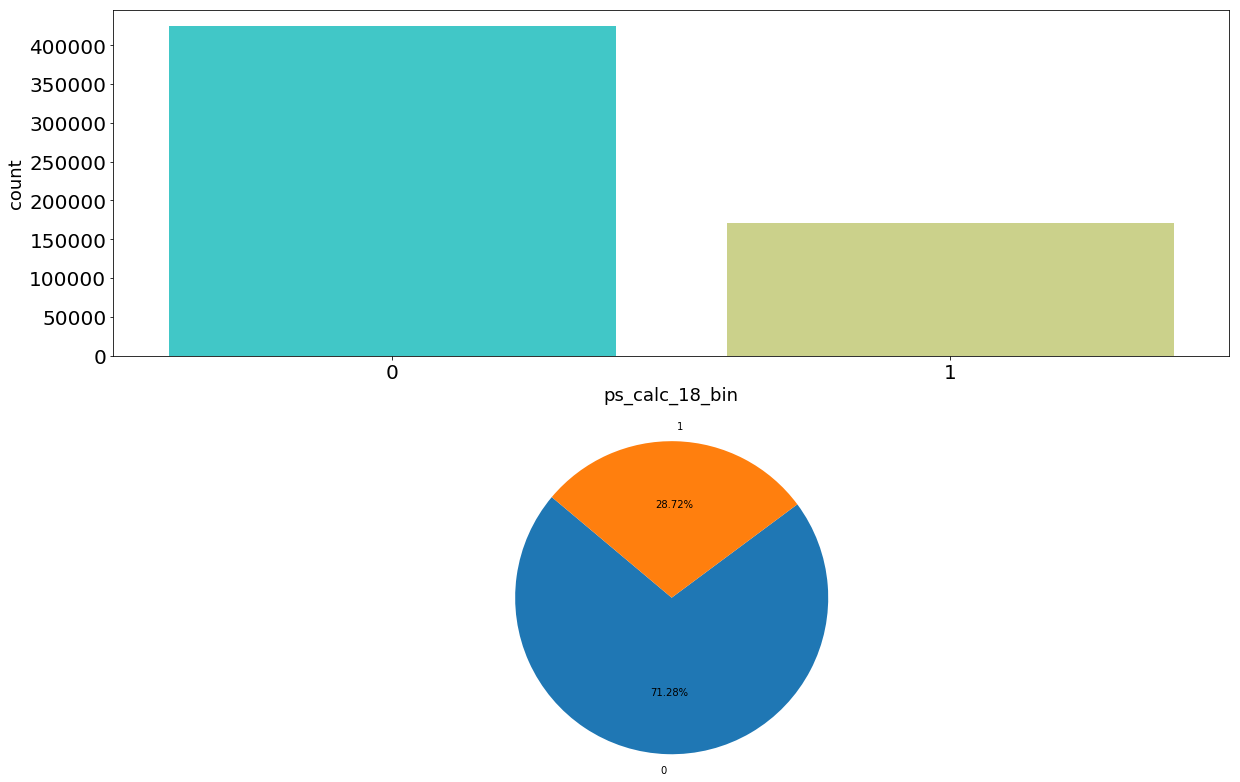

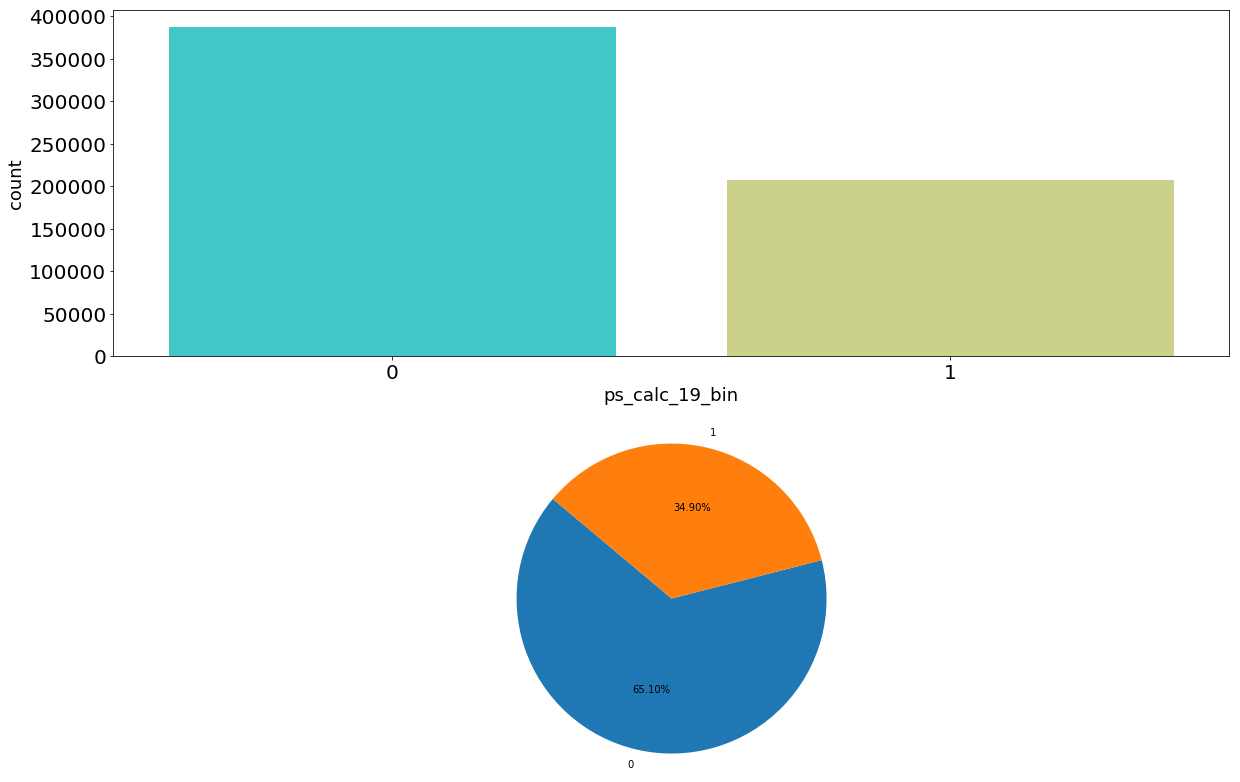

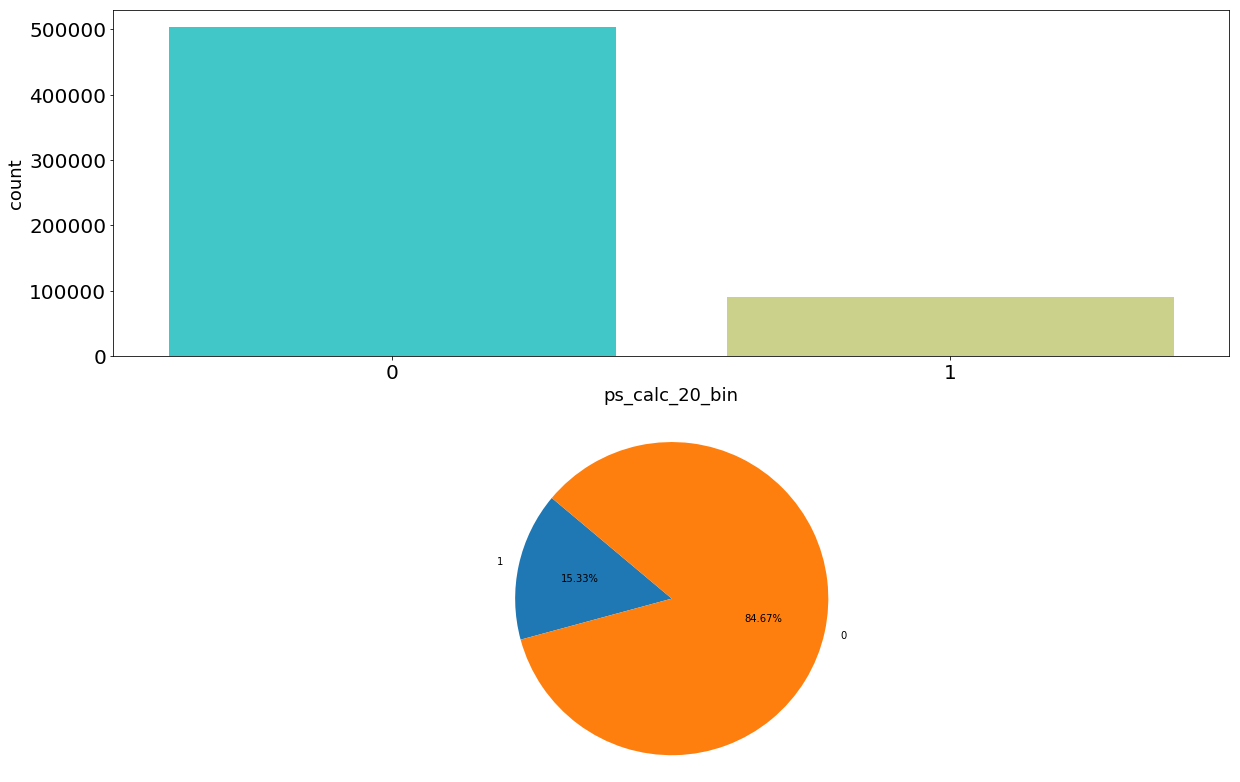

In [22]:
fa.PlotCat(2)

In [23]:
bin_col = [col for col in train.columns if '_bin' in col]
fa.PlotBinary(train,bin_col)

plot number of unique = 3

In [24]:
feature3 = fa.Describecat(3,True)

,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
5,ps_ind_04_cat,int64,3,595209,0,346965,1,248164,-1,83,0.416794,0.493311,-1.0,0.0,0.0,1.0,1.0
24,ps_car_02_cat,int64,3,595209,1,493990,0,101217,-1,5,0.829931,0.375716,-1.0,1.0,1.0,1.0,1.0
25,ps_car_03_cat,int64,3,595209,-1,411231,1,110709,0,73272,-0.504899,0.788654,-1.0,-1.0,-1.0,0.0,1.0
27,ps_car_05_cat,int64,3,595209,-1,266551,1,172667,0,155994,-0.157732,0.844417,-1.0,-1.0,0.0,1.0,1.0
29,ps_car_07_cat,int64,3,595209,1,553148,0,30575,-1,11489,0.910027,0.347106,-1.0,1.0,1.0,1.0,1.0
32,ps_car_10_cat,int64,3,595209,1,590179,0,4857,2,176,0.992136,0.091619,0.0,1.0,1.0,1.0,2.0


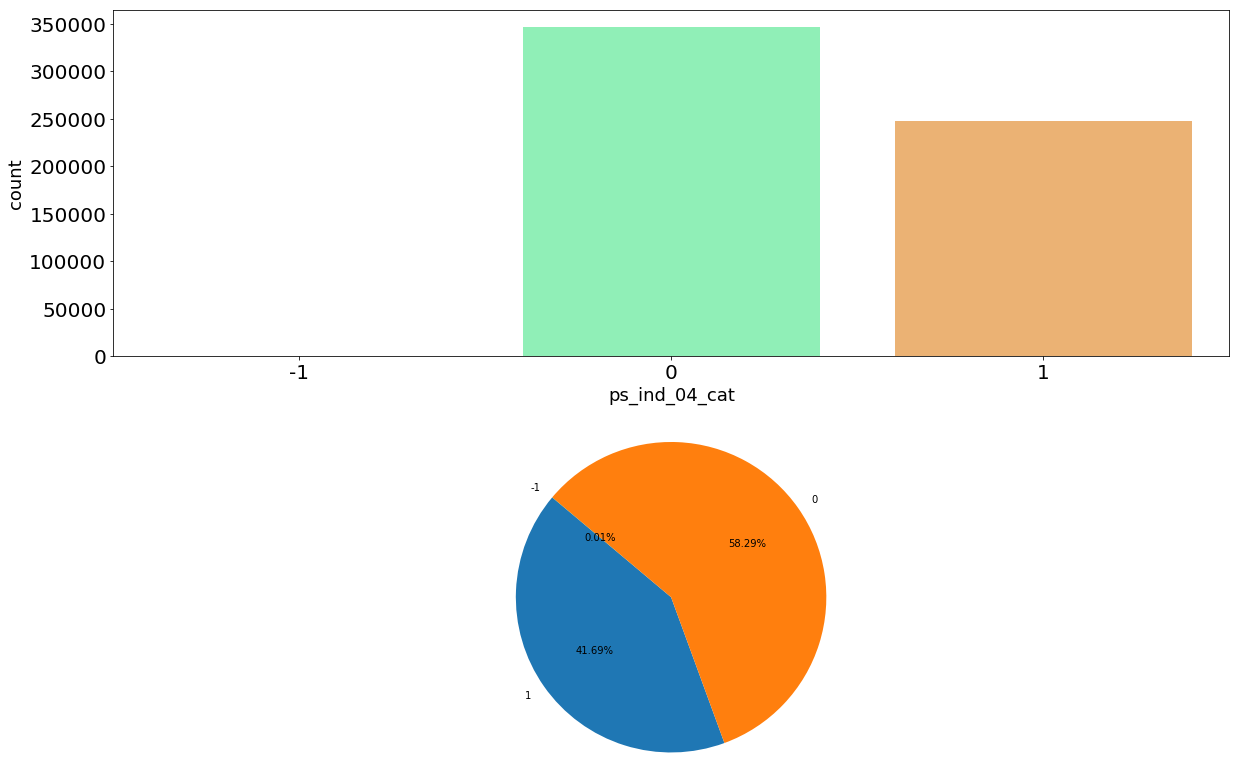

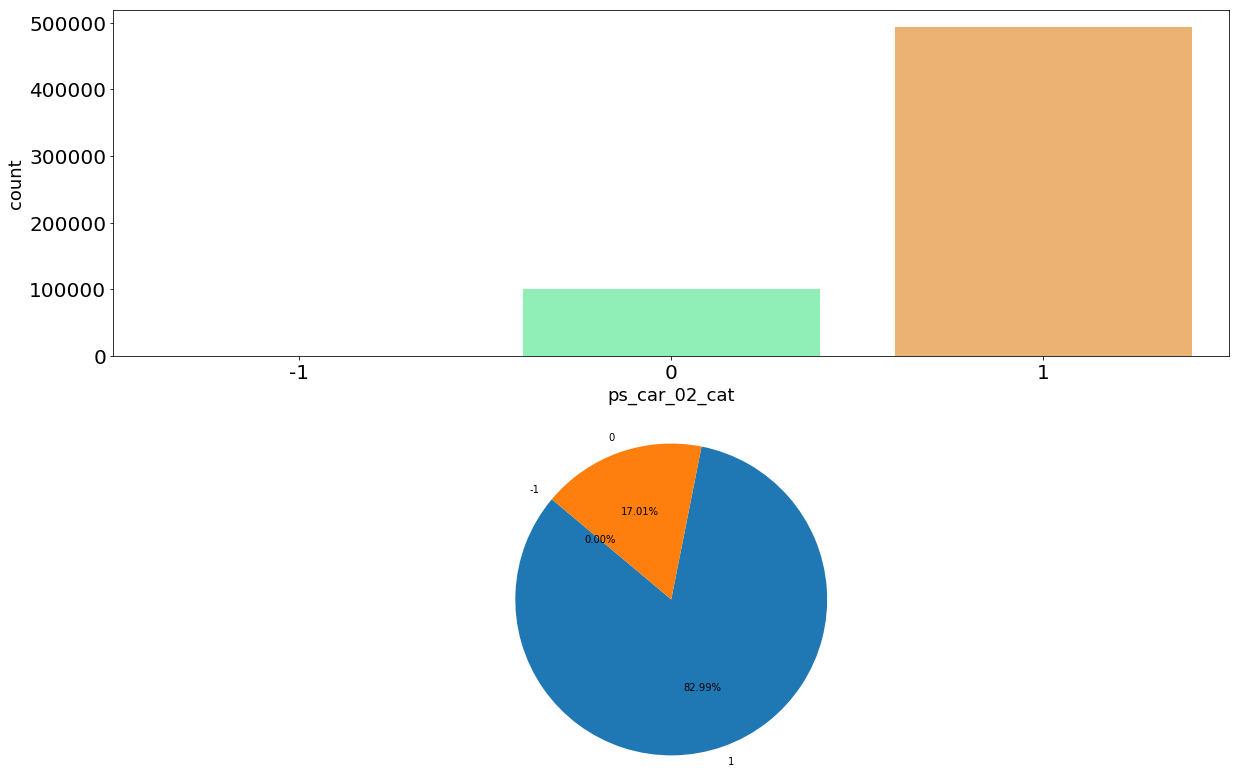

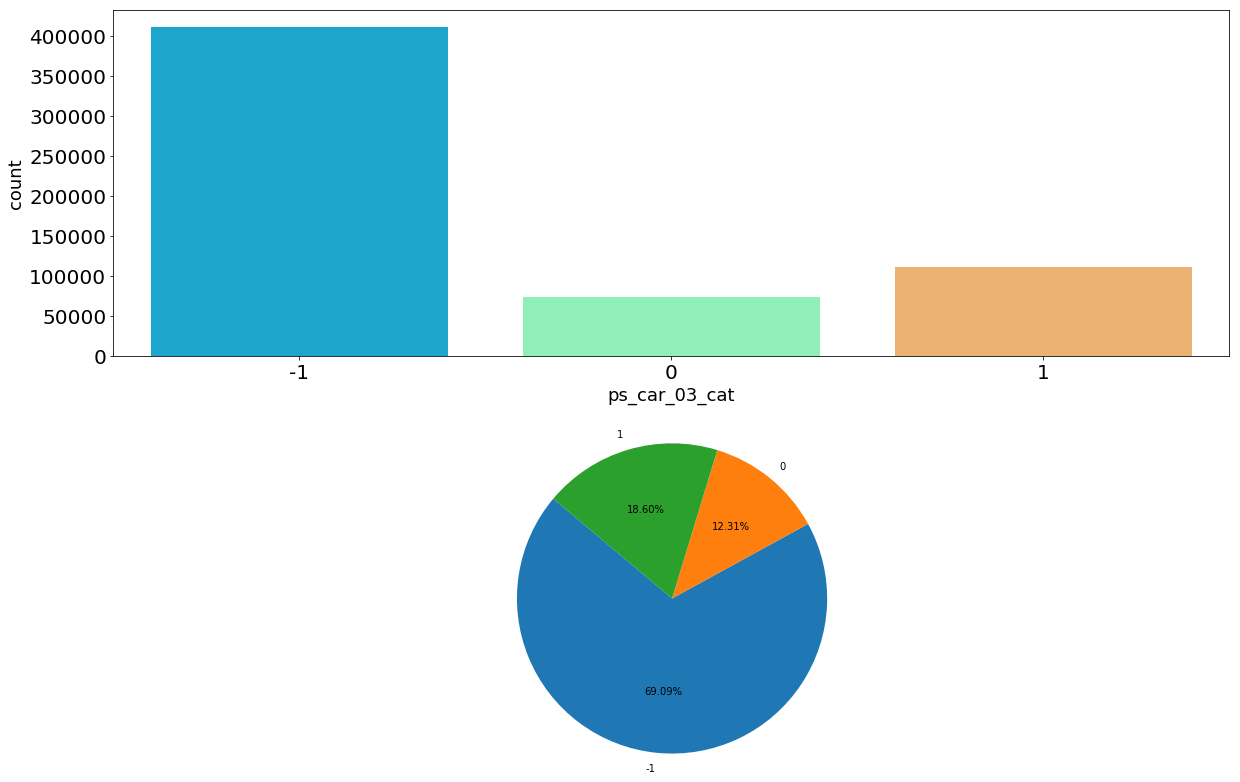

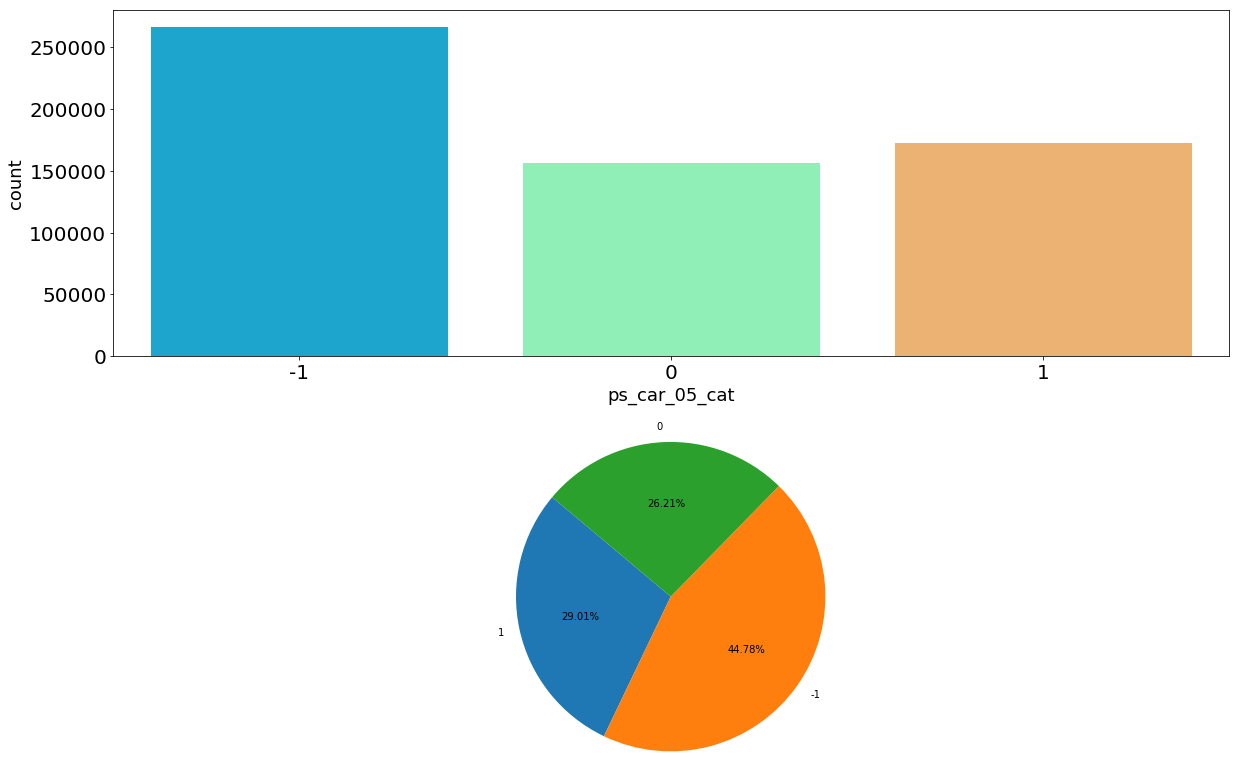

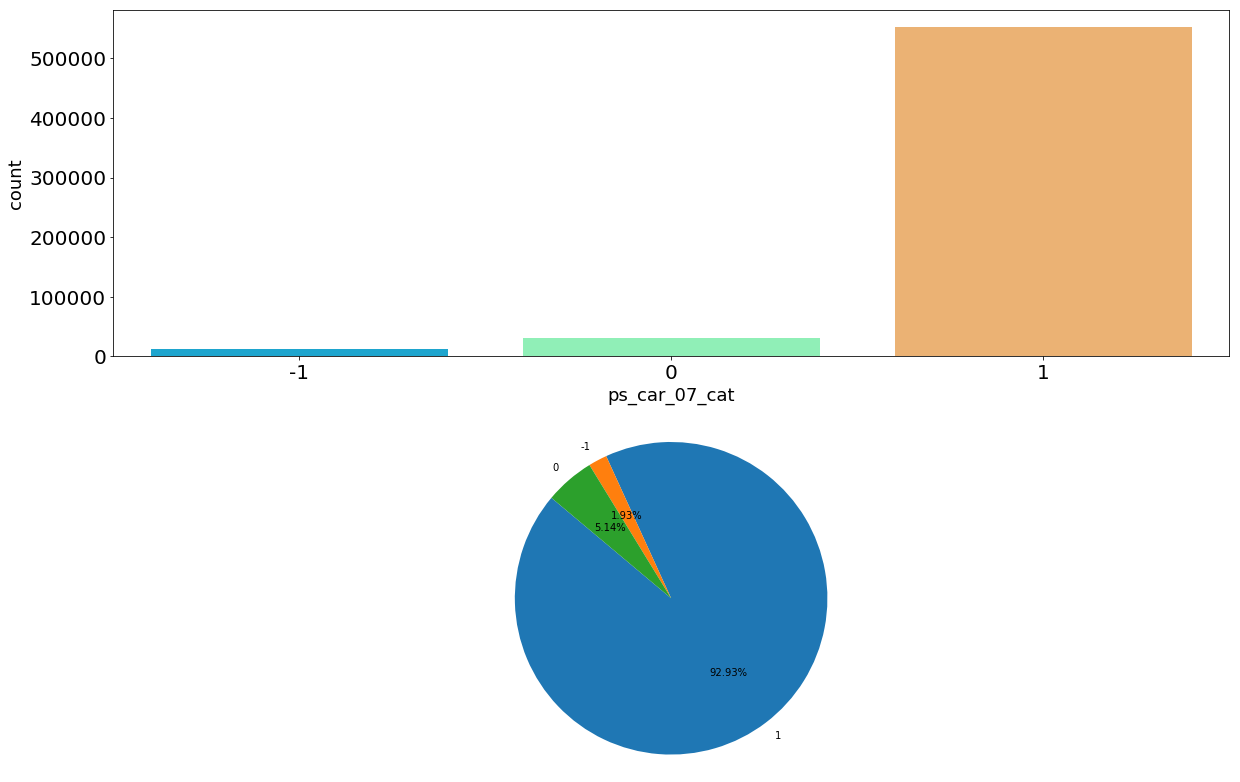

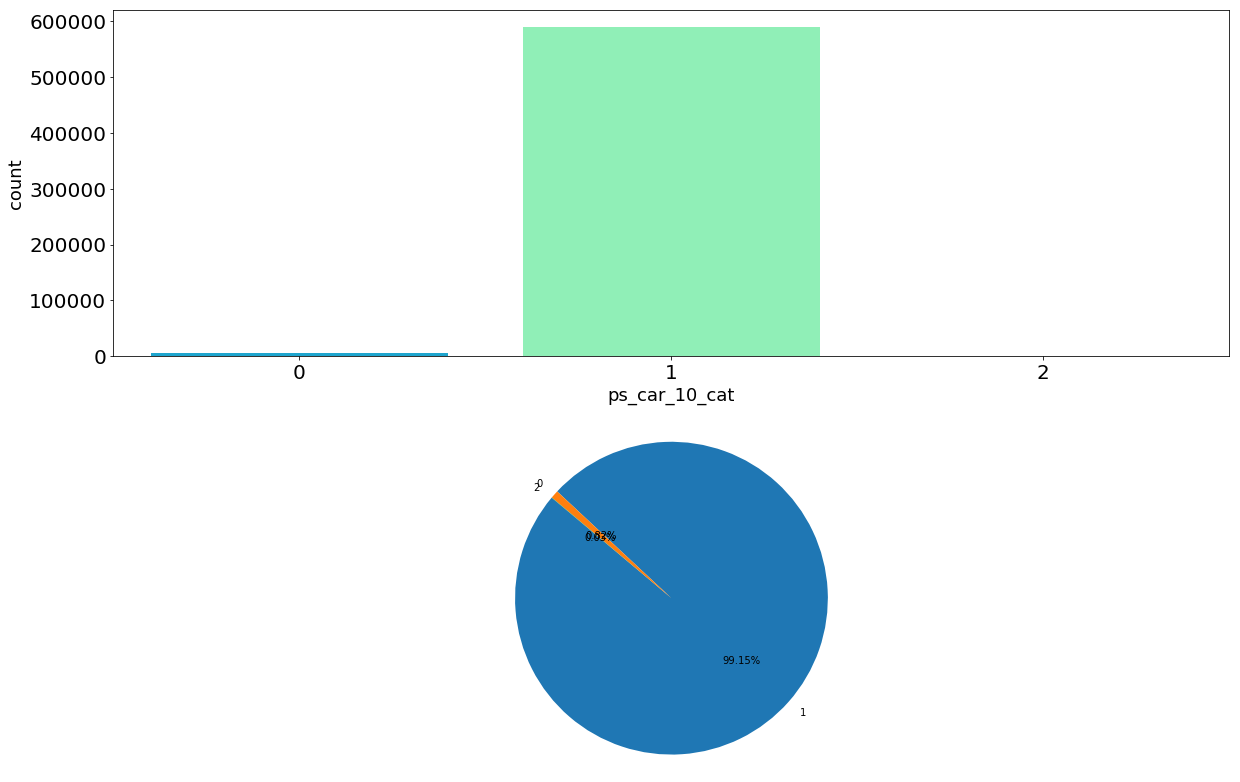

In [25]:
fa.PlotCat(3)

plot number of unique = 5

In [26]:
feature5 = fa.Describecat(5,True)

,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
3,ps_ind_02_cat,int64,5,595207,1,431859,2,123573,3,28186,1.358943,0.664594,-1.0,1.0,1.0,2.0,4.0
15,ps_ind_14,int64,5,595207,0,588832,1,5495,2,744,0.012451,0.127545,0.0,0.0,0.0,0.0,4.0
34,ps_car_11,int64,5,595207,3,318919,2,189353,1,60952,2.346072,0.832548,-1.0,2.0,3.0,3.0,3.0


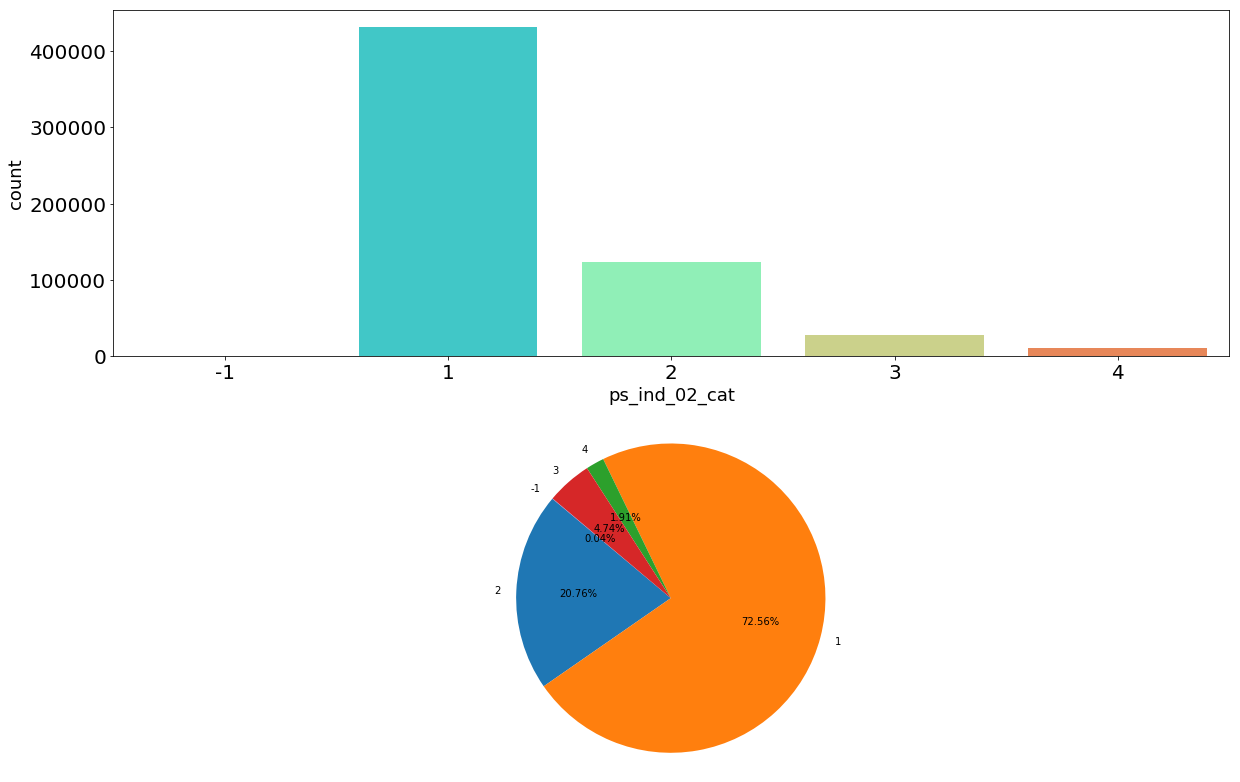

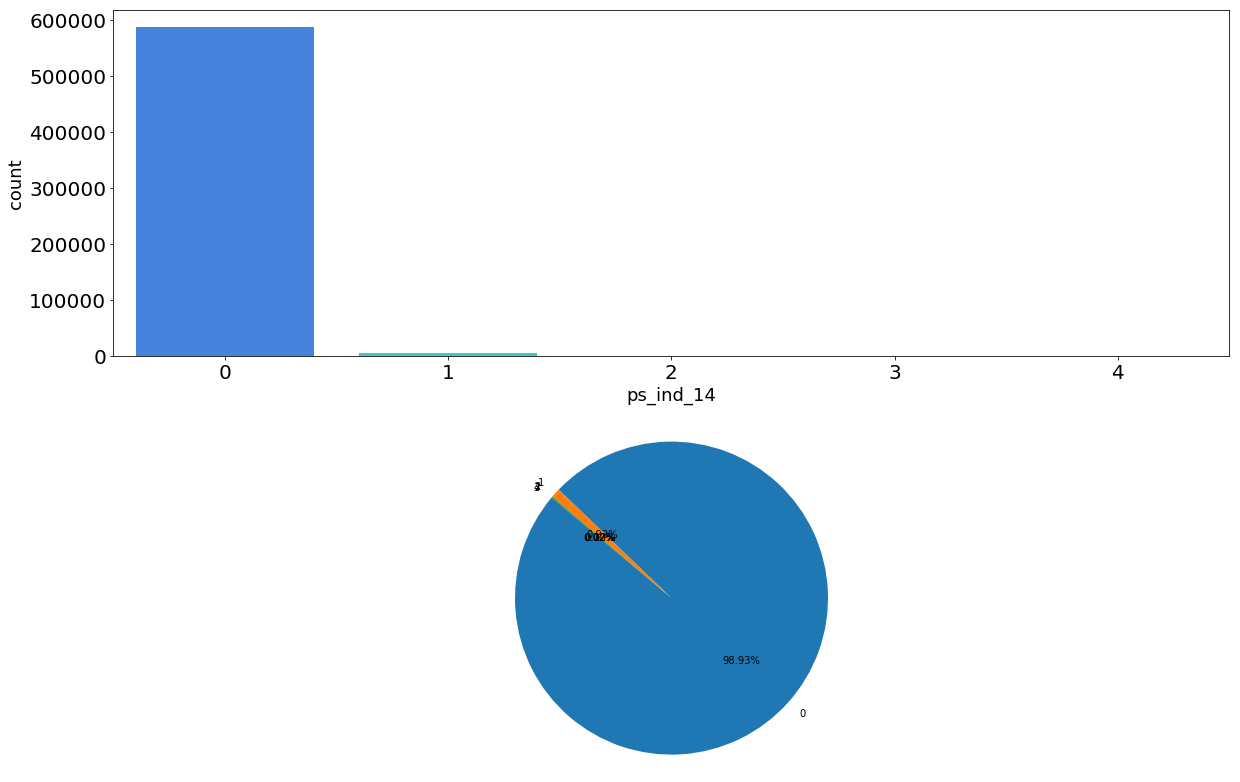

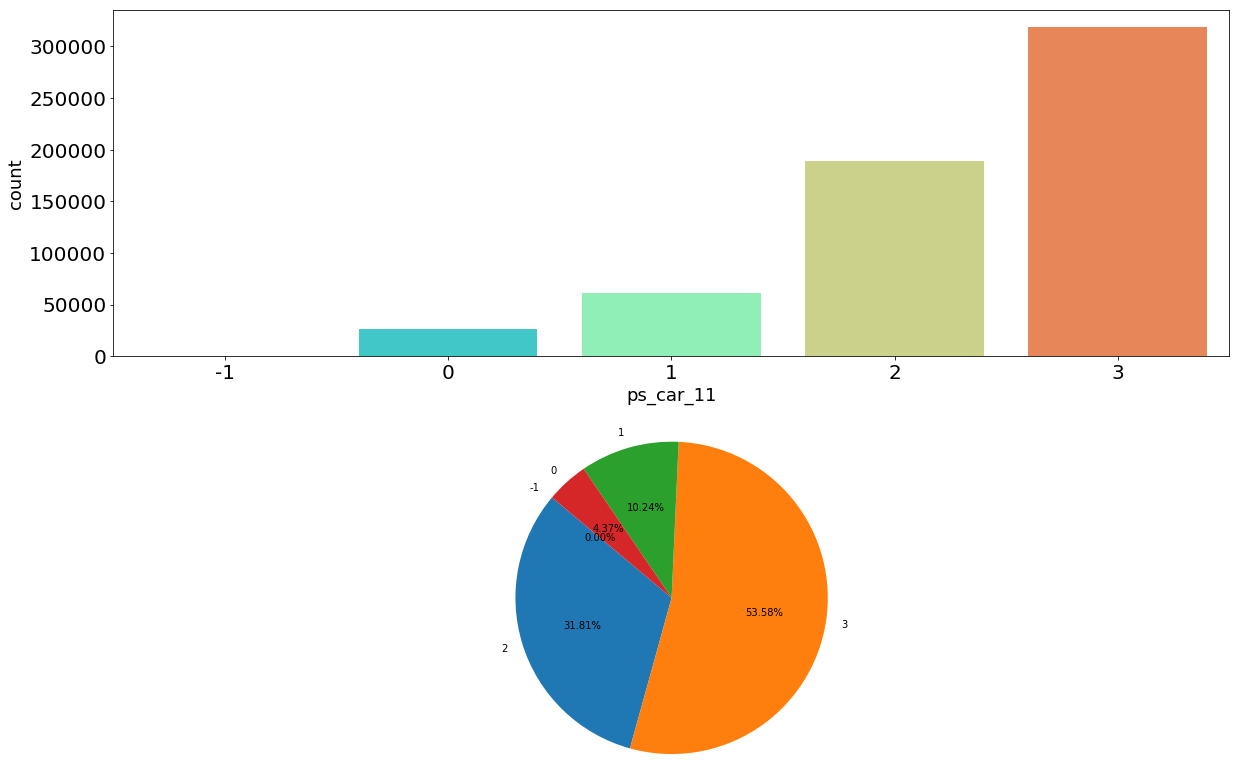

In [27]:
fa.PlotCat(5)

plot number of unique = 6

In [28]:
feature6 = fa.Describecat(6,True)

,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
31,ps_car_09_cat,int64,6,595206,2,353482,0,194518,1,29080,1.328890,0.978747,-1.0,0.0,2.0,2.0,4.0
42,ps_calc_04,int64,6,595206,2,193977,3,175512,1,108012,2.372081,1.117219,0.0,2.0,2.0,3.0,5.0


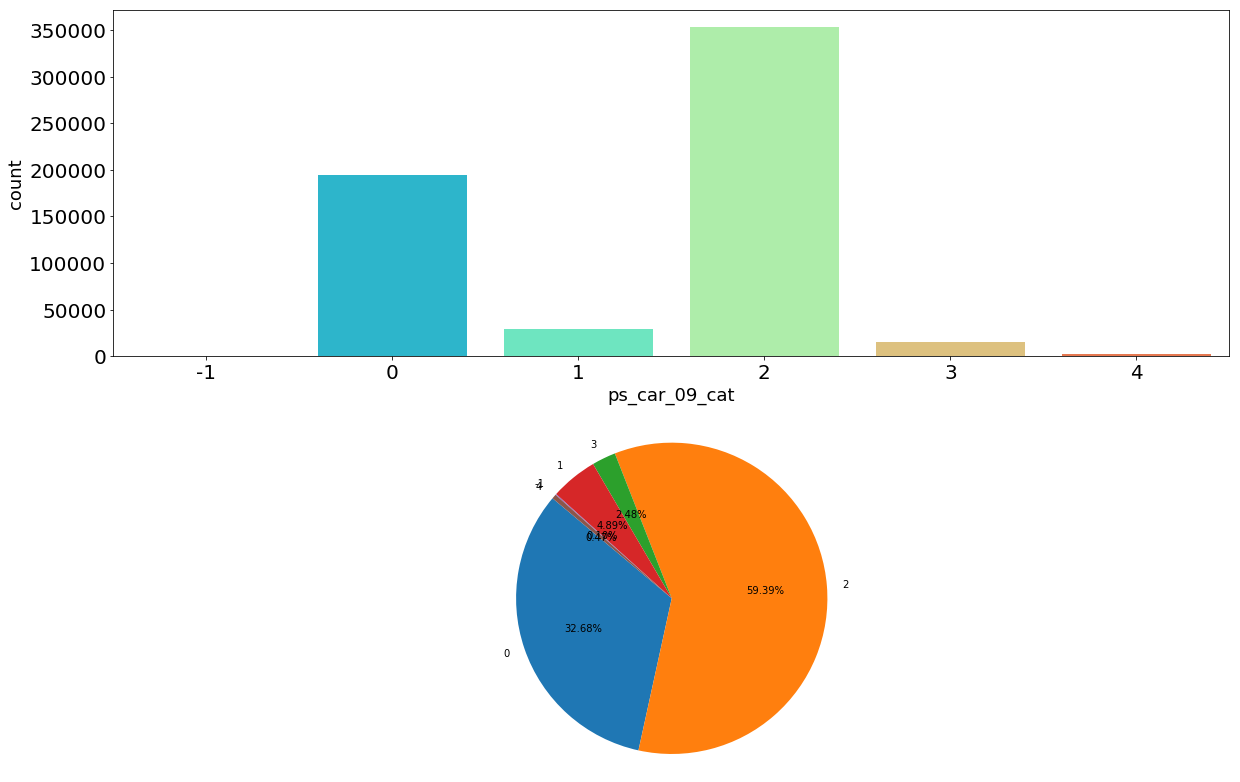

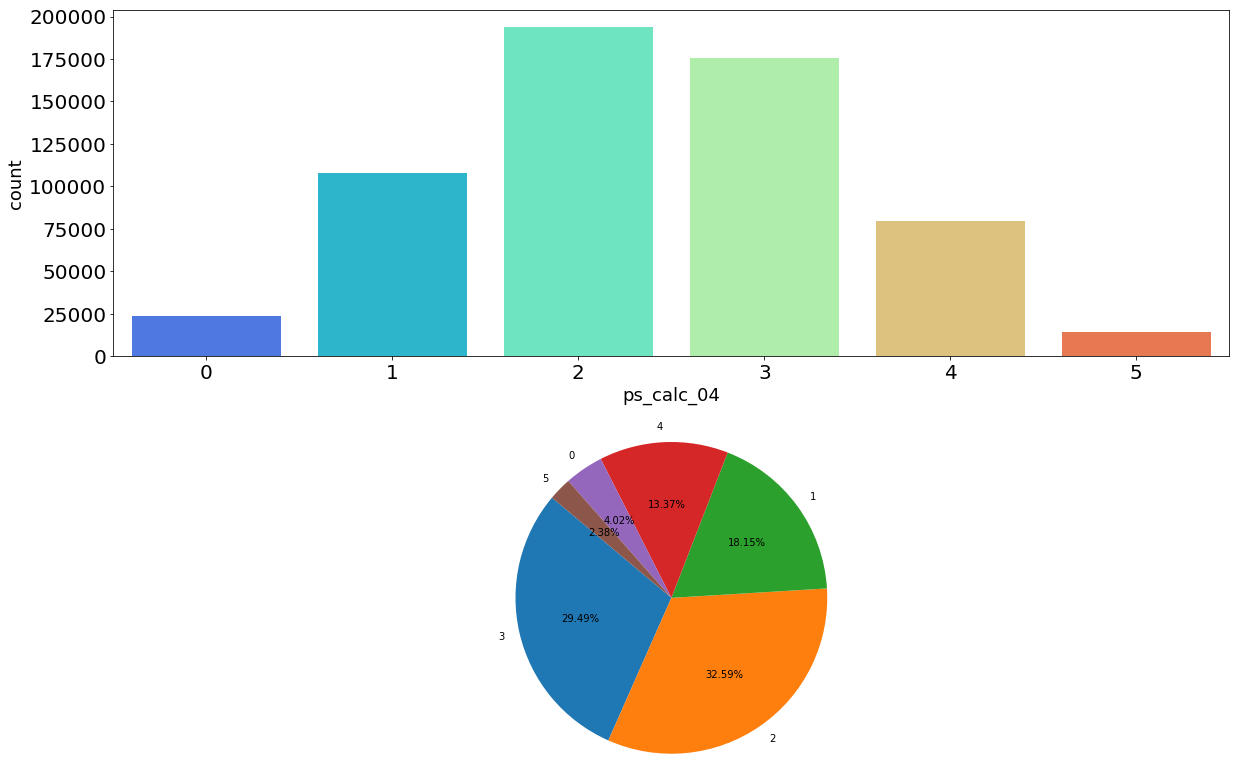

In [29]:
fa.PlotCat(6)

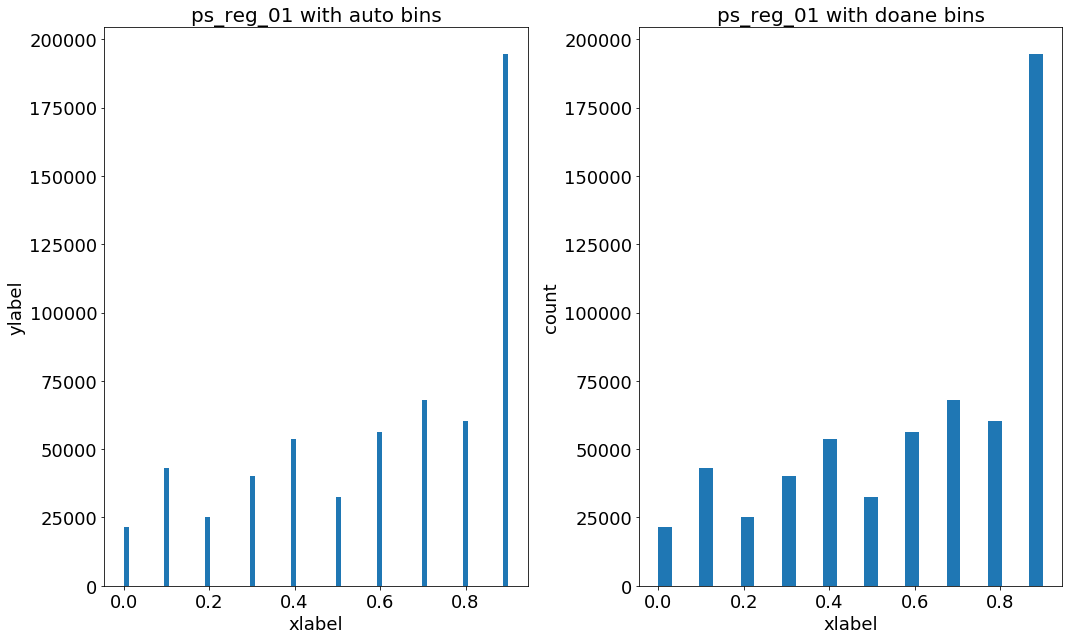

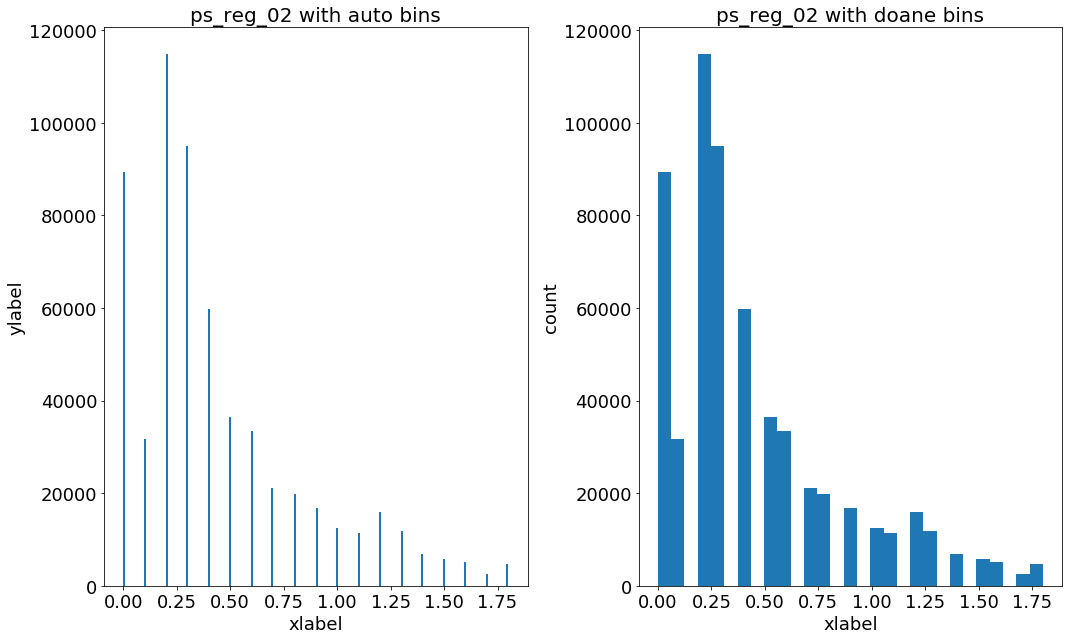

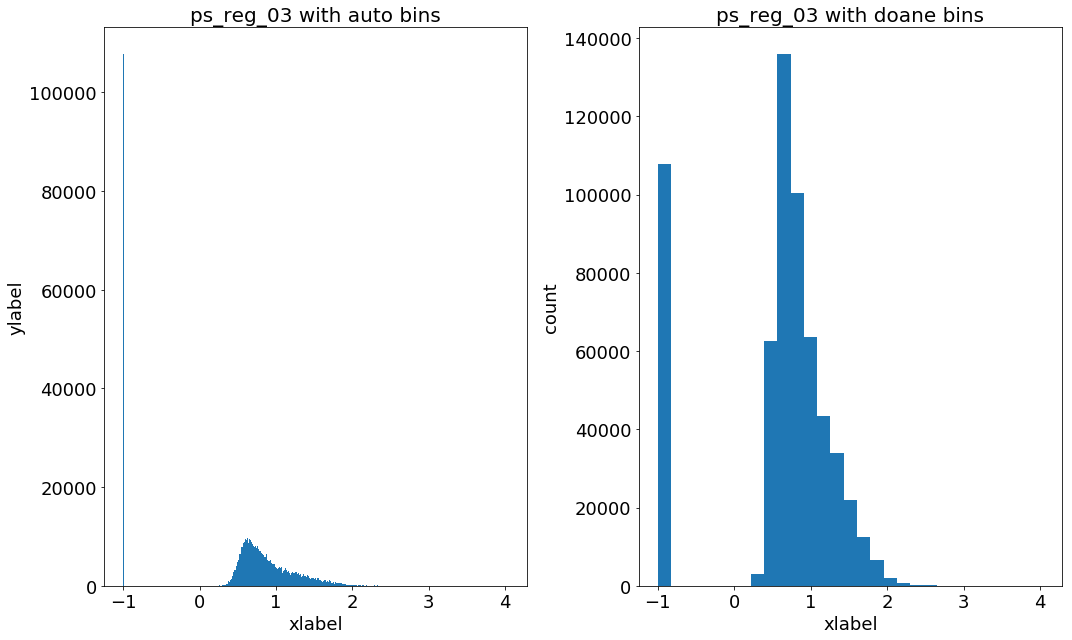

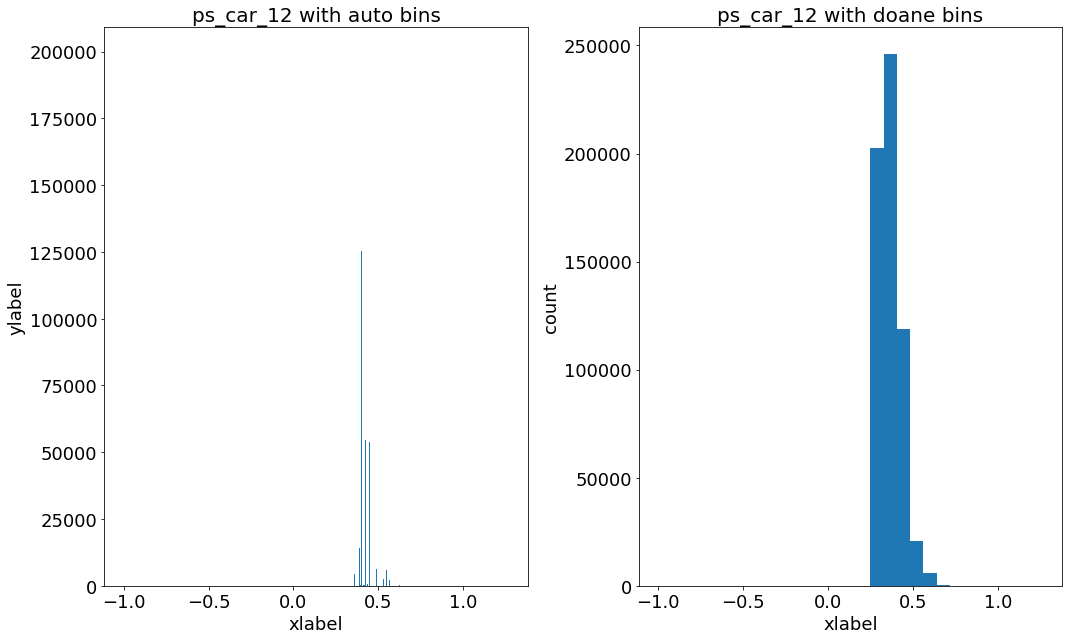

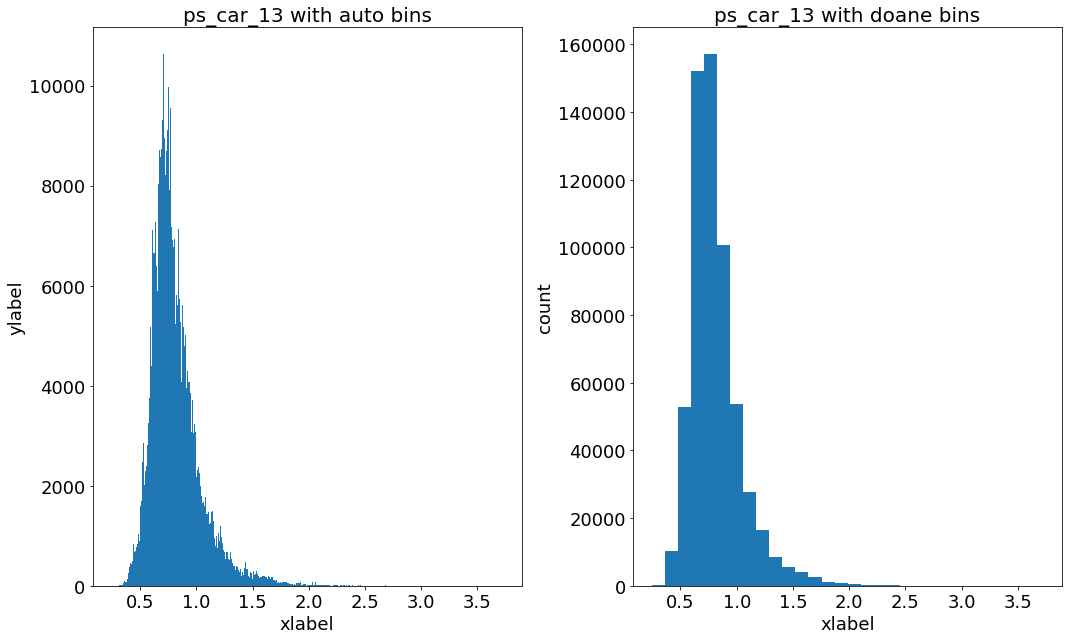

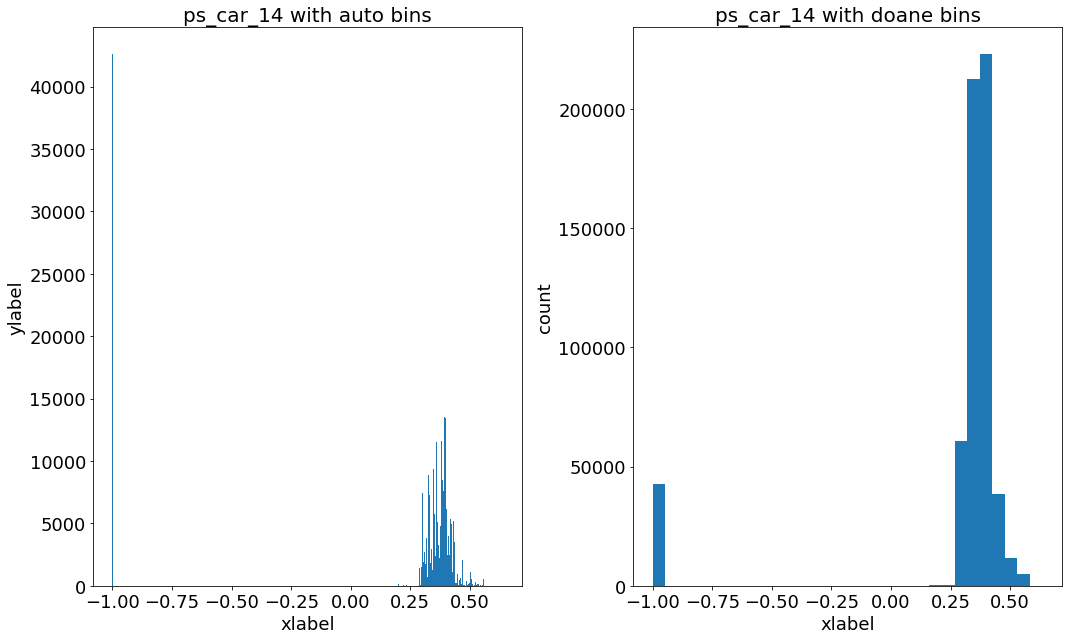

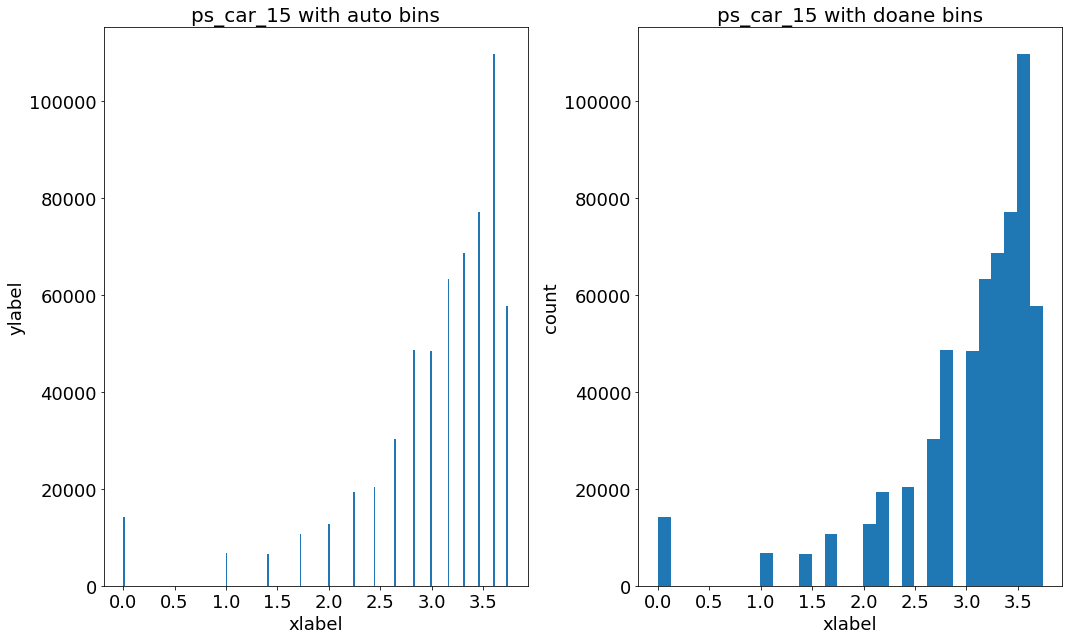

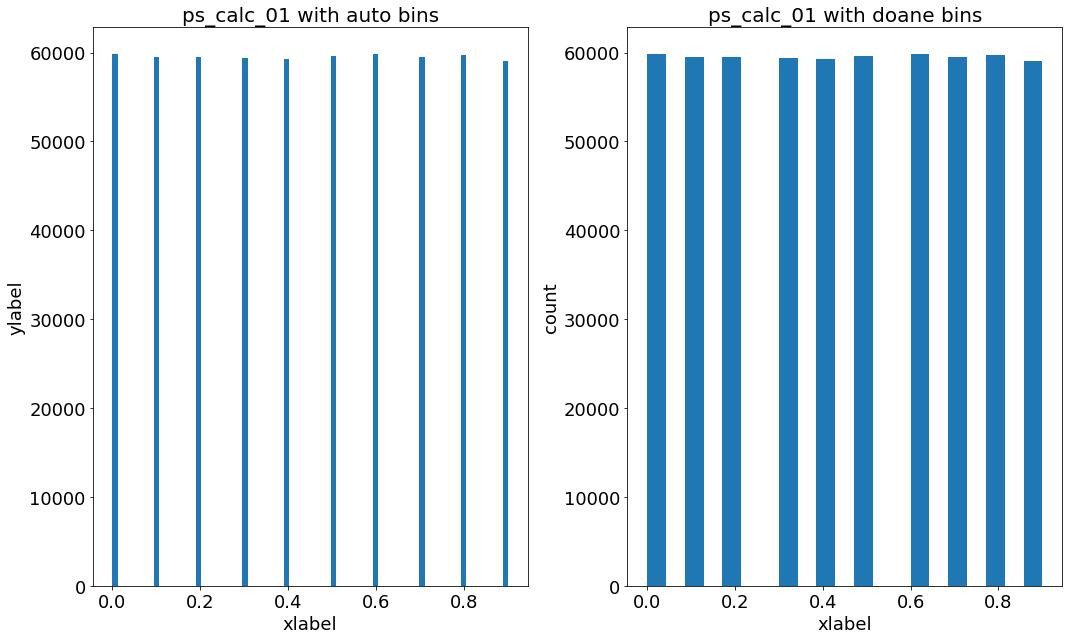

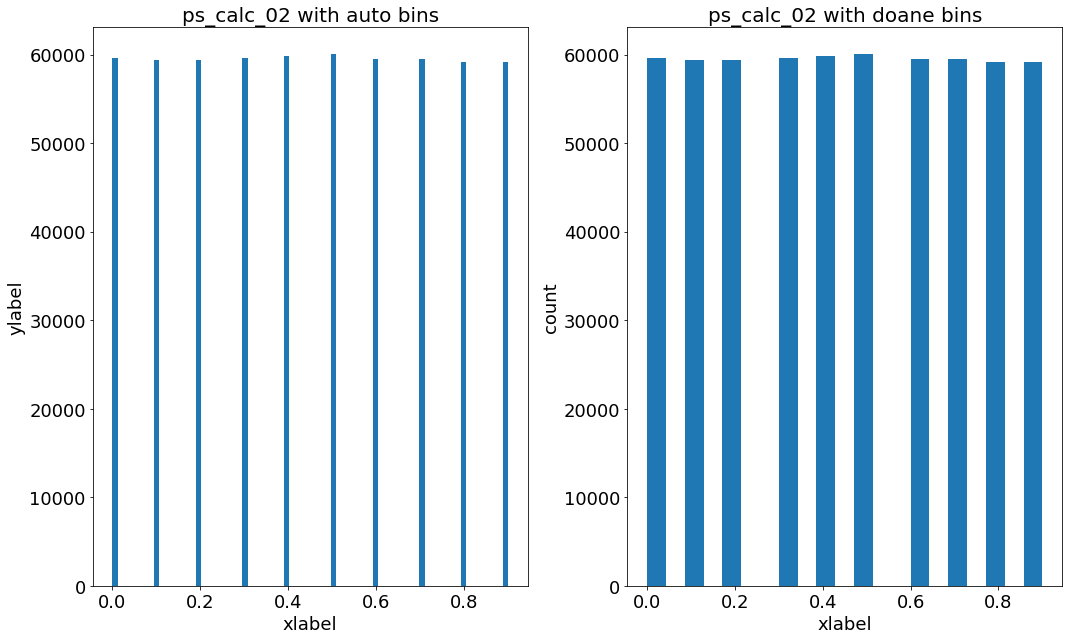

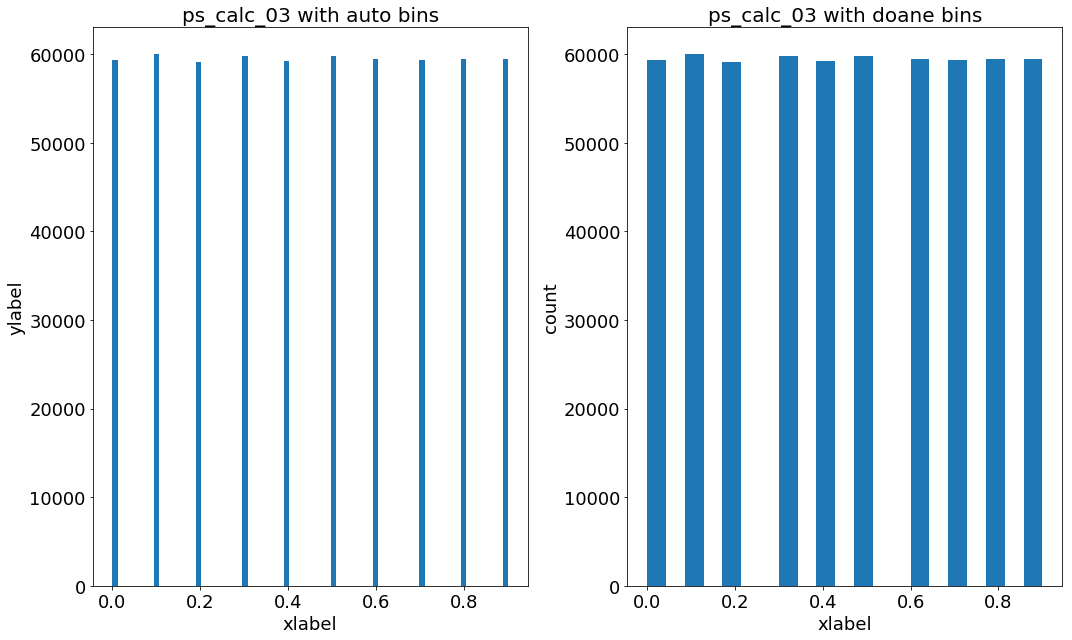

In [30]:
fa.PlotNumericalBar()

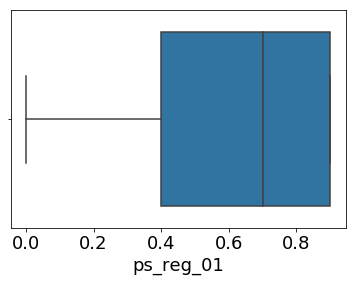

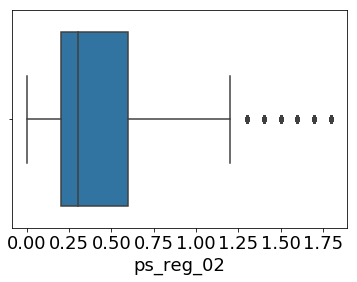

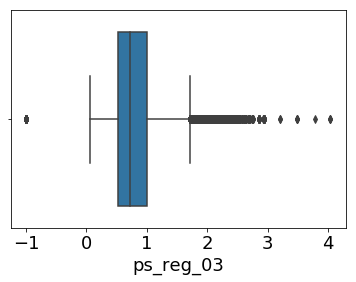

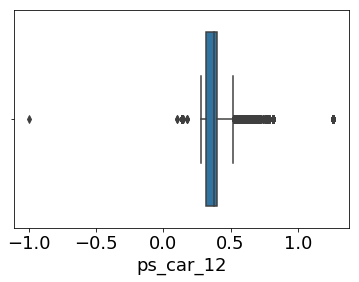

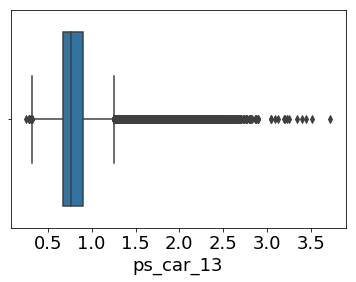

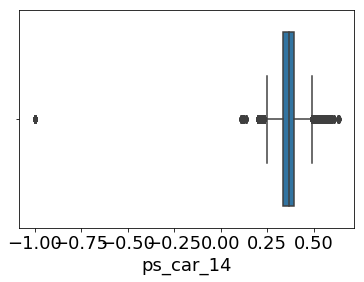

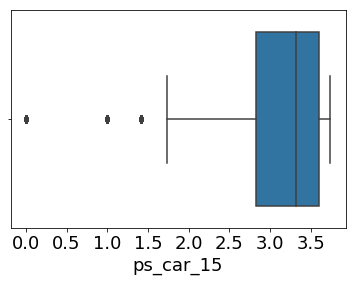

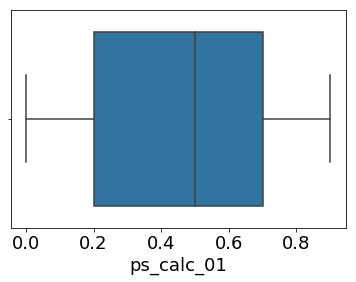

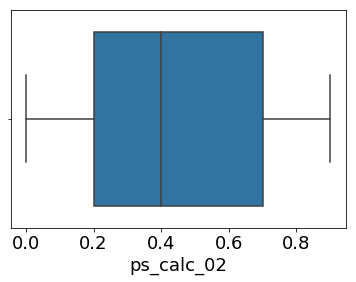

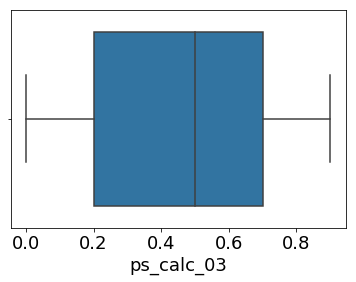

In [31]:
fa.PlotNumericalBox()

## 1.5. Interval variables
Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. 

In [32]:
data_float = train[feature_inofrmation[feature_inofrmation['Dtype'] == 'float64'].Features]

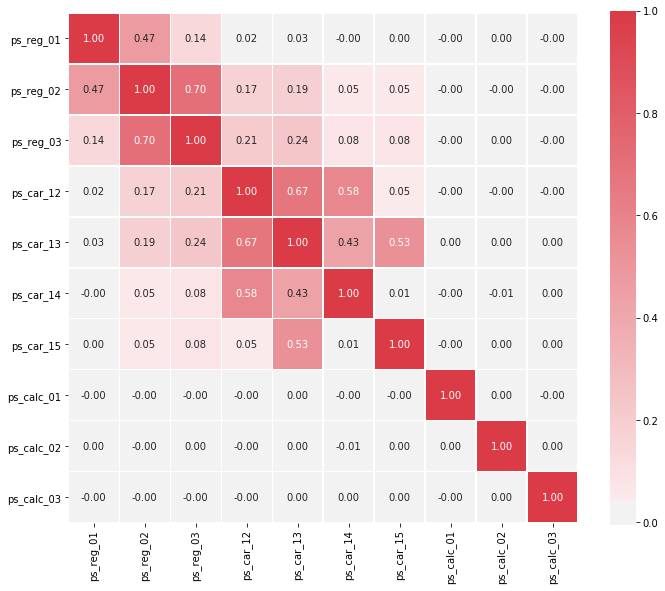

In [33]:
mc = MC.MuiltiFeatureComparisons(data_float)
mc.HeatMap()

In [34]:
s = train.sample(frac=0.1)

**ps_reg_02 and ps_reg_03**

As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

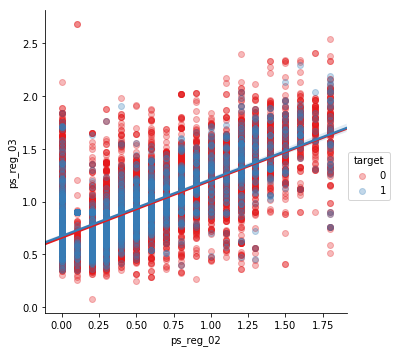

In [35]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

** ps_car_12 and ps_car_13 **

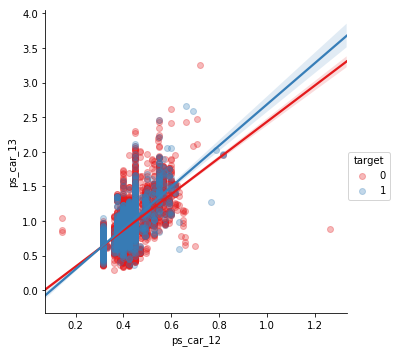

In [36]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_14

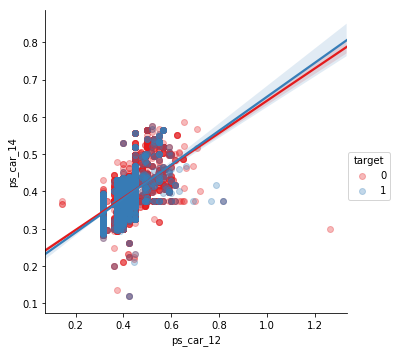

In [37]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

** ps_car_13 and ps_car_15 **

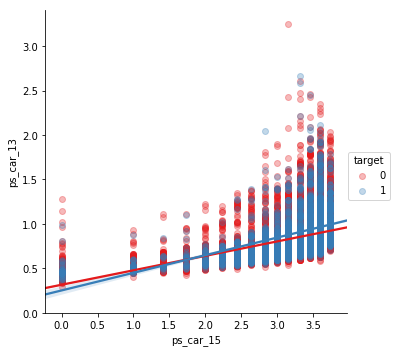

In [38]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

# 2. Feature engineering

## 2.1. Creating interaction variables

In [39]:
feng = PCAT.FeaturesEng()
iterval_f = sample_feature_inofrmation[sample_feature_inofrmation['Dtype']=='float64'].Features
train, test = feng.NumericalInteractions(train, test, iterval_f)

Before creating interactions we have 57 variables
After creating interactions we have 112 variables
Before creating interactions we have 56 variables
After creating interactions we have 111 variables


## 2.2. Frequency Encondig

In [40]:
cat_cols=['ps_ind_02_cat','ps_car_04_cat', 'ps_car_09_cat',
          'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_11_cat']

# generate dataframe for frequency features for the train and test dataset
train_freq, test_freq=feng.FreqEncoding(cat_cols, train, test)

# merge them into the original train and test dataset
train=pd.concat([train, train_freq], axis=1)
test=pd.concat([test,test_freq], axis=1)

## 2.3. Binary Encoding

In [41]:
cat_cols=['ps_ind_02_cat','ps_car_04_cat', 'ps_car_09_cat',
          'ps_ind_05_cat', 'ps_car_01_cat']

for w in cat_cols:
    train, test=feng.BinaryEncoding(train, test, w)

print('train shape is: ', train.shape)
print('test shape is: ', test.shape)

train shape is:  (216940, 135)
test shape is:  (892816, 134)


## 1.3 Features Importance 
Selecting features with a Random Forest

## 1.3 Feature Reduction

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [42]:
fsel = FSEL.FeaturesSelection()
nnew_train, nnew_test =  fsel.MainFeatureSelection(train, ['id', 'target'], test, 'target')

 1) ps_car_13^2                    0.017398
 2) ps_car_13                      0.017363
 3) ps_car_12 ps_car_13            0.017314
 4) ps_reg_03 ps_car_13            0.017196
 5) ps_car_13 ps_car_14            0.017165
 6) ps_reg_01 ps_car_13            0.016896
 7) ps_car_13 ps_car_15            0.016713
 8) ps_reg_03 ps_car_14            0.016199
 9) ps_reg_03 ps_car_12            0.015480
10) ps_reg_03 ps_car_15            0.015103
11) ps_car_14 ps_car_15            0.015071
12) ps_reg_02 ps_car_13            0.014657
13) ps_car_13 ps_calc_01           0.014598
14) ps_reg_01 ps_reg_03            0.014592
15) ps_car_13 ps_calc_02           0.014555
16) ps_car_13 ps_calc_03           0.014553
17) ps_reg_01 ps_car_14            0.014318
18) ps_reg_03^2                    0.014111
19) ps_reg_03                      0.014105
20) ps_calc_10                     0.013795
21) ps_reg_03 ps_calc_02           0.013709
22) ps_reg_03 ps_calc_03           0.013684
23) ps_calc_14                  

In [94]:
nnew_train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_03,ps_car_06_cat,ps_car_11_cat,ps_car_13,ps_car_14,...,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02 ps_calc_03,ps_car_11_cat_freq
0,353762,0,1,1,11,0.838153,6,26,0.540603,0.345688,...,0.311119,0.103706,0.000000,1.800000,0.600000,0.000000,0.27,0.00,0.00,1236
1,845629,0,5,7,5,0.728440,14,104,0.382953,0.378814,...,0.075763,0.000000,0.227288,0.000000,0.000000,0.000000,0.00,0.12,0.00,31601
2,1449185,0,4,3,4,0.869267,3,15,0.814271,0.402368,...,0.120710,0.362131,0.040237,0.994987,2.984962,0.331662,0.27,0.03,0.09,689
3,834066,0,6,6,8,1.705872,1,74,0.838387,0.378418,...,0.302734,0.151367,0.037842,2.884441,1.442221,0.360555,0.32,0.08,0.04,1769
4,436189,0,5,5,10,1.086566,0,78,0.905777,0.384838,...,0.230903,0.192419,0.346354,2.163331,1.802776,3.244996,0.30,0.54,0.45,2632


In [95]:
nnew_test.head()

,id,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_03,ps_car_06_cat,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_04,...,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02 ps_calc_03,ps_car_11_cat_freq
0,0,0,8,12,0.610328,1,65,0.669556,0.352136,1,...,0.035214,0.281709,0.211282,0.346410,2.771281,2.078461,0.08,0.06,0.48,3915
1,1,4,5,5,0.771362,11,103,0.606320,0.358329,3,...,0.143332,0.179165,0.143332,1.131371,1.414214,1.131371,0.20,0.16,0.20,8661
2,2,5,3,10,0.916174,14,29,0.896239,0.398497,2,...,0.239098,0.239098,0.239098,1.989975,1.989975,1.989975,0.36,0.36,0.36,1657
3,3,0,6,4,-1.000000,1,40,0.652110,0.381445,2,...,0.038144,0.190722,0.190722,0.244949,1.224745,1.224745,0.05,0.05,0.25,1708
4,4,5,7,4,0.817771,11,101,0.812914,0.385097,3,...,0.346588,0.231058,0.308078,2.984962,1.989975,2.653300,0.54,0.72,0.48,2601


In [80]:
# nnew_train.to_csv('nnew_train.csv')
# nnew_test.to_csv('nnew_test.csv')

In [7]:
nnew_train, nnew_test = LoadingData('./data/nnew_train.csv', './data/nnew_test.csv')

nnew_train = nnew_train.drop(['Unnamed: 0'],axis=1)
nnew_test =  nnew_test.drop(['Unnamed: 0'],axis=1)

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

# 3. Modeling
## 3.0 K-fold CV with Out-of-Fold Prediction



### 3.0.1. OOF utility functions
Convert AUC score into Gini Normalised Coeficient

### 3.0.2 Xgboost K-fold & OOF function

In this part, we are going to use the native interface of XGB and LGB, so the following functions are tailor for this. For sure it would be easiler just to call the respective sklearn api, but the native interfaces provide some nice additional capability. For instance, the 'hist' option to use fast histogram in XGB is only available via the native interface as far as I know.

Also, we need to provide the following function to convert probability into rank for these two OOF function. The needs to use normalised rank instead of predicted probabilities will become appearent later in this notebook

The k-fold function for XGB to generate OOF predictions, this function is very much similar to its sklearn counter part. The difference is that we need to use the XGB interface to facilitate the classifer, also we provide an option cover probability into rank

### 2.0.3 LigthGBM K-fold & OOF function

The same function for LGB, this one is almost identifical to the one for XGB, apart from code that call the LightGBM interface

## 3.1. Generate level 1 OOF Predictions
Almost there to actually generate some level OOF output! last things to do is the prepare our train and test data for our dear machine learning algorithms, and create the StratifiedKFold objec

Here, I would like remind you that for stacking, I will use consistent fold distribution at ALL level for ALL your model.

In [8]:
from crossValidation.cvsklearn import cross_validate_sklearn
from crossValidation.cvxgb import cross_validate_xgb
from crossValidation.cvlgb import cross_validate_lgb

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

import xgboost as xgb
import lightgbm as lgb
import time

from sklearn.model_selection import StratifiedKFold

## Tuning:

### Logistic Regression

In [10]:
# Logistic Regression tunining
penalt = ['l1', 'l2']
c = [0.1, 0.2, 0.5, 0.6]
#
name = ['logit0', 'logit1', 'logit2', 'logit3',
        'logit4', 'logit5', 'logit6', 'logit7']
l_score={}
i = 0
#
for tune_pen in penalt:
    print()
    print('//\\'*13)
    print('Tuning logistic regression penalty = {0}'.format(tune_pen))

    for tune_c in c:
        print()
        print('//'*25)
        print('Tuning logistic regression c = {0}'.format(tune_c))
        logit = LogisticRegression(penalty=tune_pen, random_state=0, C=tune_c)

        l_base_models = [(name[i], [logit, True, True])]

        l_testp = ML.Ensemble(nnew_train,
                         'target',
                         ['id','target'],
                         nnew_test,
                         'id',
                         l_base_models,
                         5)

        l_lv1_score, l_lv1_train, l_lv1_test = l_testp.FitModel()
        l_score.update(l_lv1_score)
        i = i + 1

# print(pd.DataFrame([l_score]))


//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning logistic regression penalty = l1

//////////////////////////////////////////////////
Tuning logistic regression c = 0.1

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: logit0
--------------------
fold cv 0 AUC score is 0.600559, Gini_Norm score is 0.201117
fold cv 1 AUC score is 0.596478, Gini_Norm score is 0.192955
fold cv 2 AUC score is 0.590134, Gini_Norm score is 0.180268
fold cv 3 AUC score is 0.597373, Gini_Norm score is 0.194746
fold cv 4 AUC score is 0.604743, Gini_Norm score is 0.209487
cv AUC score is 0.597826, Gini_Norm score is 0.195652
it takes 241.420 seconds to perform cross validation

//////////////////////////////////////////////////
Tuning logistic regression c = 0.2

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: logit1
--------------------
fold cv 0 AUC score is 0.600362, Gini_Norm score is 0.200724
fold cv 1 AUC score is 0.596654, G

In [11]:
pd.DataFrame([l_score])

,logit0,logit1,logit2,logit3,logit4,logit5,logit6,logit7
0,"[0.597825814683, 0.195651629366]","[0.597783214306, 0.195566428611]","[0.597711355016, 0.195422710033]","[0.597701945164, 0.195403890327]","[0.597649323224, 0.195298646448]","[0.597647299693, 0.195294599387]","[0.597643924782, 0.195287849564]","[0.597643498167, 0.195286996334]"


Based on the calculation it seems that the first model:
c = 0.1 and penalty = l1 has the best gini = 0.1956 score.

### Random Forest

In [13]:
n_est = [80, 100, 150, 200]
n_dept = [5, 10]


name = ['rf0', 'rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6', 'rf7']

r_score = {}
i = 0

for tune_n_est in n_est:
    print()
    print('//\\'*13)
    print('Tuning Random Forest = {0}'.format(tune_n_est))

    for tune_n_dept in n_dept:
        print()
        print('//'*25)
        print('Tuning Random Forest n_dept = {0}'.format(tune_n_dept))

        rf1 = RandomForestClassifier(n_estimators=tune_n_est,
                                     n_jobs=6,
                                     min_samples_split=5,
                                     max_depth=tune_n_dept,
                                     criterion='gini',
                                     random_state=0)

        l_base_models = [(name[i], [rf1, False, True])]

        l_testp = ML.Ensemble(nnew_train,
                         'target',
                         ['id','target'],
                         nnew_test,
                         'id',
                         l_base_models,
                         5)

        l_lv1_score, l_lv1_train, l_lv1_test = l_testp.FitModel()
        r_score.update(l_lv1_score)
        i = i + 1

pd.DataFrame([r_score])


//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning Random Forest = 80

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: rf0
--------------------
fold cv 0 AUC score is 0.601040, Gini_Norm score is 0.202080
fold cv 1 AUC score is 0.598763, Gini_Norm score is 0.197527
fold cv 2 AUC score is 0.594034, Gini_Norm score is 0.188068
fold cv 3 AUC score is 0.597612, Gini_Norm score is 0.195225
fold cv 4 AUC score is 0.607661, Gini_Norm score is 0.215321
cv AUC score is 0.599656, Gini_Norm score is 0.199311
it takes 51.777 seconds to perform cross validation

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: rf1
--------------------
fold cv 0 AUC score is 0.603028, Gini_Norm score is 0.206055
fold cv 1 AUC score is 0.606140, Gini_Norm score is 0.212280
fold cv 2 AUC score is 0.600661, Gini_Norm score is 0.201323
fold cv 3 AUC score is 0.604827, Gini_Norm score is 0.209654
fold cv 4 AUC score is 0.611461, Gini_Norm sco

,rf0,rf1,rf2,rf3,rf4,rf5,rf6,rf7
0,"[0.599655634993, 0.199311269987]","[0.605103275826, 0.210206551652]","[0.599803872931, 0.199607745862]","[0.605451420781, 0.210902841562]","[0.599695593165, 0.199391186331]","[0.60581867536, 0.21163735072]","[0.599694479763, 0.199388959527]","[0.60606926873, 0.212138537461]"


The calculation shoes that the seven model: n_estimators = 200 and max_depth = 10 has the hoghest score

### BN

In [14]:
tt = [0.7, 0.8, 0.9, 1.0]
name = ['nb0', 'nb1', 'nb3', 'nb4']
l_score = {}
i = 0
for s in tt:
    print()
    print('//\\'*13)
    print('Tuning BN alpha = {0}'.format(s))
    nb = BernoulliNB(alpha=s)


    l_base_models = [(name[i], [nb, True, True])]

    l_testp = ML.Ensemble(nnew_train,
                     'target',
                     ['id', 'target'],
                     nnew_test,
                     'id',
                     l_base_models,
                     5)

    l_lv1_score, l_lv1_train, l_lv1_test = l_testp.FitModel()
    l_score.update(l_lv1_score)
    i += 1


nb_score = l_score
pd.DataFrame([nb_score])


//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning BN alpha = 0.7

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: nb0
--------------------
fold cv 0 AUC score is 0.585148, Gini_Norm score is 0.170296
fold cv 1 AUC score is 0.584793, Gini_Norm score is 0.169587
fold cv 2 AUC score is 0.575421, Gini_Norm score is 0.150841
fold cv 3 AUC score is 0.578943, Gini_Norm score is 0.157885
fold cv 4 AUC score is 0.589558, Gini_Norm score is 0.179115
cv AUC score is 0.582661, Gini_Norm score is 0.165322
it takes 12.986 seconds to perform cross validation

//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning BN alpha = 0.8

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: nb1
--------------------
fold cv 0 AUC score is 0.585148, Gini_Norm score is 0.170295
fold cv 1 AUC score is 0.584793, Gini_Norm score is 0.169587
fold cv 2 AUC score is 0.575420, Gini_Norm score is 0.150841
fold cv 3 AUC score is 0.578943, Gini_Norm score

,nb0,nb1,nb3,nb4
0,"[0.582660791987, 0.165321583975]","[0.582660685983, 0.165321371965]","[0.5826605847, 0.1653211694]","[0.582660534649, 0.165321069298]"


### Xgboost

In [12]:
t_max_depth = [3, 4, 5]
t_eta = [0.05, 0.1, 0.5]


name = ['xgb0', 'xgb1', 'xgb2', 'xgb3',
        'xgb4', 'xgb5', 'xgb6', 'xgb7', 'xgb8']


l_score = {}
i = 0

for tune_max_depth in t_max_depth:
    print()
    print('//\\'*13)
    print('Tuning xgb max_depth = {0}'.format(tune_max_depth))
    for tune_eta in t_eta:
        print()
        print('//'*25)
        print('Tuning xgb eta = {0}'.format(tune_eta))
        # XGBoost
        xgb_params = {
          "booster"  :  "gbtree",
          "objective"         :  "binary:logistic",
          "tree_method": "hist",
          "eval_metric": "auc",
          "eta": tune_eta,
          "max_depth": tune_max_depth,
          "min_child_weight": 10,
          "gamma": 0.7,
          "subsample": 0.76,

          "colsample_bytree": 0.95,
          "nthread": 6,
          "seed": 0,
          'silent': 1}

        base_models = [(name[i], [xgb_params, False, False])]

        l_testp = ML.Ensemble(nnew_train,
                       'target',
                       ['id', 'target'],
                       nnew_test,
                       'id',
                       base_models,
                       5)

        l_lv1_score, l_lv1_train, l_lv1_test = l_testp.FitModel()
        l_score.update(l_lv1_score)
        i += 1


pd.DataFrame([l_score])


//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning xgb max_depth = 3

//////////////////////////////////////////////////
Tuning xgb eta = 0.05

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
xgb: xgb0
--------------------
fold cv 0 AUC score is 0.615142, Gini_Norm score is 0.230284
fold cv 1 AUC score is 0.613793, Gini_Norm score is 0.227587
fold cv 2 AUC score is 0.612151, Gini_Norm score is 0.224301
fold cv 3 AUC score is 0.616587, Gini_Norm score is 0.233173
fold cv 4 AUC score is 0.622668, Gini_Norm score is 0.245335
cv AUC score is 0.616017, Gini_Norm score is 0.232034
it takes 82.737 seconds to perform cross validation

//////////////////////////////////////////////////
Tuning xgb eta = 0.1

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
xgb: xgb1
--------------------
fold cv 0 AUC score is 0.615780, Gini_Norm score is 0.231561
fold cv 1 AUC score is 0.613078, Gini_Norm score is 0.226157
fold cv 2 AUC score is 0.611

,xgb0,xgb1,xgb2,xgb3,xgb4,xgb5,xgb6,xgb7,xgb8
0,"[0.616016915877, 0.232033831753]","[0.615188898653, 0.230377797307]","[0.612188820194, 0.224377640388]","[0.615551432724, 0.231102865448]","[0.614958905818, 0.229917811636]","[0.610019315226, 0.220038630452]","[0.615153598189, 0.230307196379]","[0.614377306471, 0.228754612942]","[0.604381467266, 0.208762934532]"


Max_depth = 3 and eta = 0.05 has the highest score

### LightGBM

In [17]:
t_learning_rate = [0.05, 0.1, 0.5]
t_max_depth = [4, 5, 6]
name=['lgb0','lgb1','lgb2','lgb3','lgb4',
     'lgb5','lgb6', 'lgb7','lgb8']

l_score = {}
i = 0

for tune_max_depth in t_max_depth:
    print()
    print('//\\'*13)
    print('Tuning lgb max_depth = {0}'.format(tune_max_depth))
    for tune_learning in t_learning_rate:
        print()
        print('//'*25)
        print('Tuning lgb learning rate= {0}'.format(tune_learning))
        # LightGBoost
        lgb_params = {
            'task': 'train',
            'boosting_type': 'dart',
            'objective': 'binary',
            'metric': {'auc'},
            'num_leaves': 22,
            'min_sum_hessian_in_leaf': 20,
            'max_depth': tune_max_depth,
            'learning_rate': tune_learning,#0.1,  # 0.618580
            'num_threads': 6,
            'feature_fraction': 0.6894,
            'bagging_fraction': 0.4218,
            'max_drop': 5,
            'drop_rate': 0.0123,
            'min_data_in_leaf': 10,
            'bagging_freq': 1,
            'lambda_l1': 1,
            'lambda_l2': 0.01,
            'verbose': 1
        }

        base_models = [(name[i], [lgb_params, False, False, True])]

        l_testp = ML.Ensemble(nnew_train,
                         'target',
                         ['id', 'target'],
                         nnew_test,
                         'id',
                         base_models,
                         5)

        l_lv1_score, l_lv1_train, l_lv1_test = l_testp.FitModel()
        l_score.update(l_lv1_score)
        i = i + 1





pd.DataFrame([l_score])


//\//\//\//\//\//\//\//\//\//\//\//\//\
Tuning lgb max_depth = 4

//////////////////////////////////////////////////
Tuning lgb learning rate= 0.05

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
lgb: lgb0
--------------------
fold cv 0 AUC score is 0.614950, Gini_Norm score is 0.229900
fold cv 1 AUC score is 0.613113, Gini_Norm score is 0.226226
fold cv 2 AUC score is 0.611873, Gini_Norm score is 0.223747
fold cv 3 AUC score is 0.615055, Gini_Norm score is 0.230109
fold cv 4 AUC score is 0.621566, Gini_Norm score is 0.243131
cv AUC score is 0.615190, Gini_Norm score is 0.230379
it takes 54.471 seconds to perform cross validation

//////////////////////////////////////////////////
Tuning lgb learning rate= 0.1

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
lgb: lgb1
--------------------
fold cv 0 AUC score is 0.614581, Gini_Norm score is 0.229162
fold cv 1 AUC score is 0.612085, Gini_Norm score is 0.224171
fold cv 2 

,lgb0,lgb1,lgb2,lgb3,lgb4,lgb5,lgb6,lgb7,lgb8
0,"[0.615189605036, 0.230379210071]","[0.612915787918, 0.225831575837]","[0.606844083586, 0.213688167171]","[0.613458223065, 0.22691644613]","[0.610806422361, 0.221612844722]","[0.596598830281, 0.193197660563]","[0.613210663928, 0.226421327855]","[0.612751879956, 0.225503759913]","[0.602417089154, 0.204834178309]"


In [18]:
pd.DataFrame([l_score])

,lgb0,lgb1,lgb2,lgb3,lgb4,lgb5,lgb6,lgb7,lgb8
0,"[0.615189605036, 0.230379210071]","[0.612915787918, 0.225831575837]","[0.606844083586, 0.213688167171]","[0.613458223065, 0.22691644613]","[0.610806422361, 0.221612844722]","[0.596598830281, 0.193197660563]","[0.613210663928, 0.226421327855]","[0.612751879956, 0.225503759913]","[0.602417089154, 0.204834178309]"


max_depth = 4 and learbing rate = 0.05 has the best result

It is seen that chaning alpha does not change the gini score

### 3.1.1. Level One

- Random Forest 1
- Random Forest 2
- Logistic Regression
- BernoulliNB
- XGBoost
- LightGBM

In [19]:
# Random Forest
rf0=RandomForestClassifier(n_estimators=200, n_jobs=6, min_samples_split=5, max_depth=10,
                          criterion='gini', random_state=0)

# Random Forest
rf1=RandomForestClassifier(n_estimators=100, n_jobs=6, min_samples_split=5, max_depth=5,
                          criterion='gini', random_state=0)

# Logistic Regression
logit=LogisticRegression(random_state=0, C=0.1, penalty='l1')

# BernouliNB()
nb=BernoulliNB()

# XGBoost
xgb_params = {
    "booster"  :  "gbtree", 
    "objective"         :  "binary:logistic",
    "tree_method": "hist",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 3,
    "min_child_weight": 10,
    "gamma": 0.70,
    "subsample": 0.76,

    "colsample_bytree": 0.95,
    "nthread": 6,
    "seed": 0,
    'silent': 1
}

# LightGBoost
lgb_params = {
    'task': 'train',
    'boosting_type': 'dart',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 22,
    'min_sum_hessian_in_leaf': 20,
    'max_depth': 4,
    'learning_rate': 0.05,  # 0.618580
    'num_threads': 6,
    'feature_fraction': 0.6894,
    'bagging_fraction': 0.4218,
    'max_drop': 5,
    'drop_rate': 0.0123,
    'min_data_in_leaf': 10,
    'bagging_freq': 1,
    'lambda_l1': 1,
    'lambda_l2': 0.01,
    'verbose': 1
}


base_models = [('rf0', [rf0, False, True]),('rf1', [rf1, False, True]),('nb0',[nb,True,True]),
               ('logit0', [logit, True, True]),
               ('xgb0', [xgb_params, False, False]),
               ('lgb0', [lgb_params, False, False,True])]


testp = ML.Ensemble(nnew_train,
                 'target',
                 ['id','target'],
                 nnew_test,
                 'id',
                 base_models,
                 5)

lv1_score, lv1_train, lv1_test = testp.FitModel()




-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: rf0
--------------------
fold cv 0 AUC score is 0.605047, Gini_Norm score is 0.210095
fold cv 1 AUC score is 0.605762, Gini_Norm score is 0.211524
fold cv 2 AUC score is 0.602105, Gini_Norm score is 0.204210
fold cv 3 AUC score is 0.604953, Gini_Norm score is 0.209905
fold cv 4 AUC score is 0.613117, Gini_Norm score is 0.226233
cv AUC score is 0.606069, Gini_Norm score is 0.212139
it takes 229.470 seconds to perform cross validation

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: rf1
--------------------
fold cv 0 AUC score is 0.600872, Gini_Norm score is 0.201744
fold cv 1 AUC score is 0.599315, Gini_Norm score is 0.198630
fold cv 2 AUC score is 0.594168, Gini_Norm score is 0.188336
fold cv 3 AUC score is 0.597708, Gini_Norm score is 0.195416
fold cv 4 AUC score is 0.607792, Gini_Norm score is 0.215583
cv AUC score is 0.599804, Gini_Norm score is 0.1996

In [20]:
lv1_train.head()

,lgb0,logit0,nb0,rf0,rf1,xgb0
0,0.096446,0.064564,0.003708,0.077517,0.084620,0.083728
1,0.085269,0.057766,0.015696,0.079527,0.074102,0.065838
2,0.115396,0.118682,0.551665,0.109026,0.111143,0.101369
3,0.144494,0.136814,0.895994,0.114745,0.121495,0.137624
4,0.143216,0.122538,0.979595,0.120325,0.122130,0.117697


In [45]:
lv1_train.head()

,lgb0,logit0,nb0,rf0,rf1,xgb0
0,0.100351,0.063840,0.003708,0.082085,0.084620,0.090450
1,0.079048,0.050483,0.015696,0.071762,0.074102,0.061526
2,0.108474,0.120619,0.551665,0.111038,0.111143,0.107630
3,0.169732,0.132846,0.895994,0.117746,0.121495,0.114748
4,0.150424,0.122391,0.979595,0.120591,0.122130,0.117688


### 3.2.1. Level Two

- Random Forest 1
- Logistic Regression
- XGBoost 1
- XGBoost 2
- LightGBM

In [21]:
base_models = [('rf0', [rf0, True, True]),
               ('logit0', [logit, True, True]),
               ('xgb0', [xgb_params, False, False]),
               ('xgb1', [xgb_params, True, False]),
               ('lgb0', [lgb_params, True, False, False])]


testp2 = ML.Ensemble(lv1_train,
                 nnew_train['target'],
                 [],
                 lv1_test,
                 [],
                 base_models,
                 5)

lv2_score, lv2_train, lv2_test = testp2.FitModel()



-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: rf0
--------------------
fold cv 0 AUC score is 0.613456, Gini_Norm score is 0.226911
fold cv 1 AUC score is 0.612604, Gini_Norm score is 0.225209
fold cv 2 AUC score is 0.612087, Gini_Norm score is 0.224174
fold cv 3 AUC score is 0.612870, Gini_Norm score is 0.225741
fold cv 4 AUC score is 0.619986, Gini_Norm score is 0.239972
cv AUC score is 0.613931, Gini_Norm score is 0.227862
it takes 118.786 seconds to perform cross validation

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: logit0
--------------------
fold cv 0 AUC score is 0.615274, Gini_Norm score is 0.230549
fold cv 1 AUC score is 0.614222, Gini_Norm score is 0.228444
fold cv 2 AUC score is 0.612666, Gini_Norm score is 0.225332
fold cv 3 AUC score is 0.616506, Gini_Norm score is 0.233012
fold cv 4 AUC score is 0.622333, Gini_Norm score is 0.244667
cv AUC score is 0.616093, Gini_Norm score is 0.2

### 3.4.1. Level Three
- Logistic Regression
- XGBoost 

In [22]:
xgb_lv3_params = {
    "booster"  :  "gbtree", 
    "objective"         :  "binary:logistic",
    "tree_method": "hist",
    "eval_metric": "auc",
    "eta": 0.1,
    "max_depth": 2,
    "min_child_weight": 10,
    "gamma": 0.70,
    "subsample": 0.76,
    "colsample_bytree": 0.95,
    "nthread": 6,
    "seed": 0,
    'silent': 1
}

base_models = [('logit0', [logit, True, True]),
               ('xgb0', [xgb_lv3_params, False, False])]


testp3 = ML.Ensemble(lv2_train,
                 nnew_train['target'],
                 [],
                 lv2_test,
                 [],
                 base_models,
                 5)

lv3_score, lv3_train, lv3_test = testp3.FitModel()


-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
sklearn: logit0
--------------------
fold cv 0 AUC score is 0.615766, Gini_Norm score is 0.231532
fold cv 1 AUC score is 0.614335, Gini_Norm score is 0.228670
fold cv 2 AUC score is 0.612980, Gini_Norm score is 0.225960
fold cv 3 AUC score is 0.616982, Gini_Norm score is 0.233963
fold cv 4 AUC score is 0.622587, Gini_Norm score is 0.245175
cv AUC score is 0.616492, Gini_Norm score is 0.232983
it takes 10.084 seconds to perform cross validation

-*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- -*- 
xgb: xgb0
--------------------
fold cv 0 AUC score is 0.615957, Gini_Norm score is 0.231914
fold cv 1 AUC score is 0.614051, Gini_Norm score is 0.228101
fold cv 2 AUC score is 0.613016, Gini_Norm score is 0.226031
fold cv 3 AUC score is 0.617415, Gini_Norm score is 0.234829
fold cv 4 AUC score is 0.622403, Gini_Norm score is 0.244805
cv AUC score is 0.613011, Gini_Norm score is 0.22602

# 4. Prediction: Average Level 3 outputs

with tuning hyper parameter

In [24]:
prediction = pd.DataFrame(columns=['predition'])
prediction['predition'] = lv3_train.mean(axis=1)
def auc_to_gini_norm(auc_score):return 2*auc_score-1
print(auc_to_gini_norm(roc_auc_score(nnew_train['target'], prediction)))

0.230960282228


without tuning hyper parameter

We can always still do a simple weight average, to bring the two together and see if there any extra juice to be squeezed

In [48]:
prediction = pd.DataFrame(columns=['predition'])
prediction['predition'] = lv3_train.mean(axis=1)
prediction.head()

,predition
0,0.084893
1,0.061568
2,0.111607
3,0.136439
4,0.123040


In [49]:
def auc_to_gini_norm(auc_score):return 2*auc_score-1
print(auc_to_gini_norm(roc_auc_score(nnew_train['target'], prediction)))

0.229112873896


This is the final result for and its  Gini score that I reach